C:\Users\zyliu\AppData\Local\Temp\ipykernel_26040\1259972522.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test_df = pd.read_csv("05092023-pos-philic-M-F-train.csv")


['X100.063_0.208_7204', 'X1013.655_2.216_2485', 'X1014.502_4.725_7669', 'X104.13_8.901_7261', 'X105.113_8.817_8938', 'X106.111_8.836_8179', 'X1063.671_2.091_2310', 'X108.056_1.526_844', 'X108.056_2.047_9512', 'X108.056_2.725_4730', 'X108.056_3.67_2029', 'X108.056_3.755_9075', 'X108.056_6.944_9310', 'X108.056_6.969_2190', 'X1091.884_5.378_7681', 'X113.035_5.908_3965', 'X113.986_4.624_9280', 'X114.039_4.598_5466', 'X114.041_4.57_2300', 'X114.099_4.543_9458', 'X114.146_4.581_9279', 'X116.096_6.073_7609', 'X117.066_6.571_5562', 'X118.058_5.369_2435', 'X120.045_2.955_5012', 'X120.109_5.006_3784', 'X120.109_5.011_5516', 'X121.084_5.006_8834', 'X123.079_3.733_4048', 'X123.092_0.304_1103', 'X123.092_3.412_9274', 'X124.051_2.694_9501', 'X127.112_1.127_9480', 'X129.102_2.183_5238', 'X129.102_2.726_8304', 'X132.066_6.854_1626', 'X132.134_5.364_9246', 'X133.065_1.275_8841', 'X135.067_1.267_8970', 'X140.118_2.191_5049', 'X144.077_1.328_8906', 'X144.113_1.247_9257', 'X145.032_4.663_2795', 'X147.078_

C:\Users\zyliu\AppData\Local\Temp\ipykernel_26040\1259972522.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


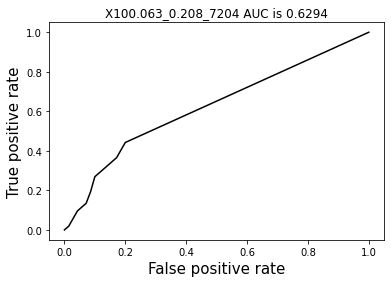

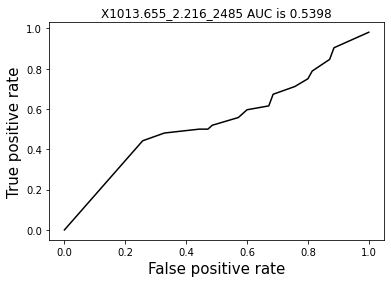

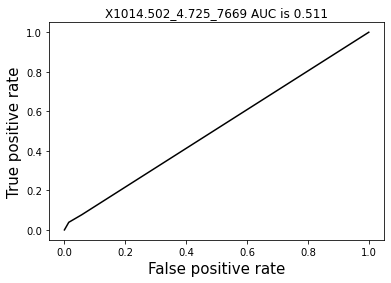

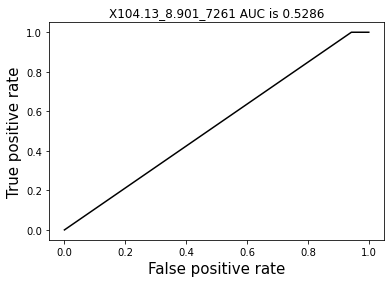

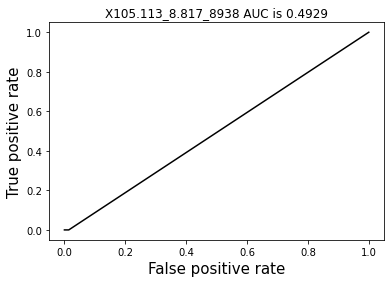

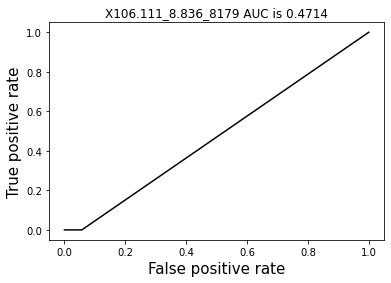

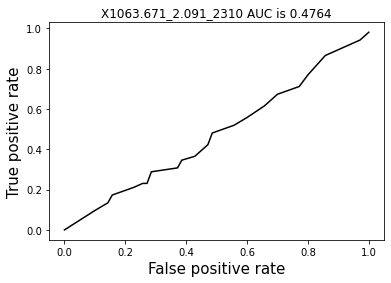

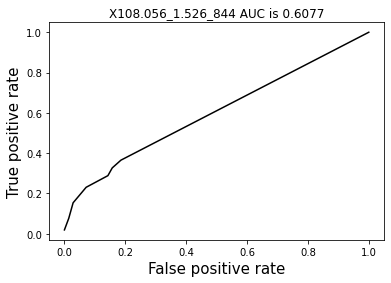

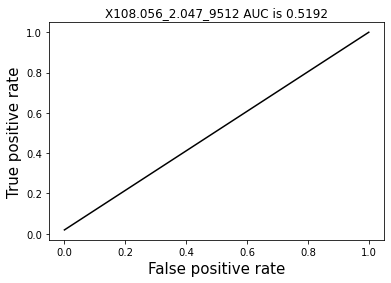

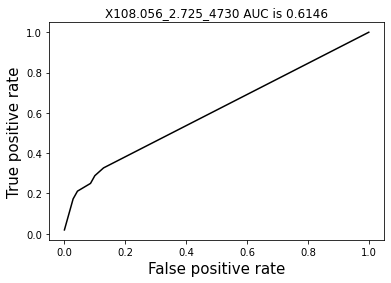

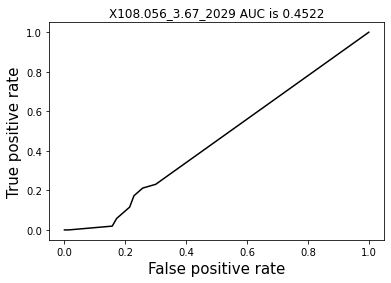

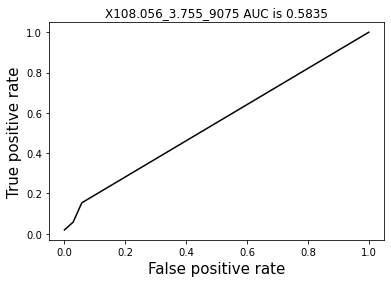

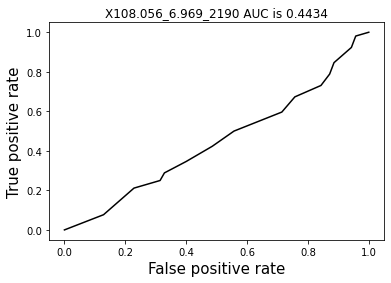

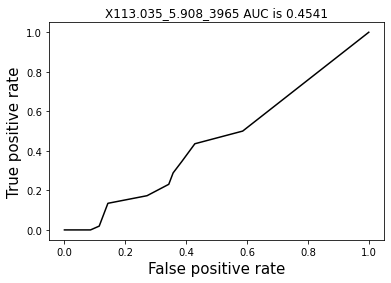

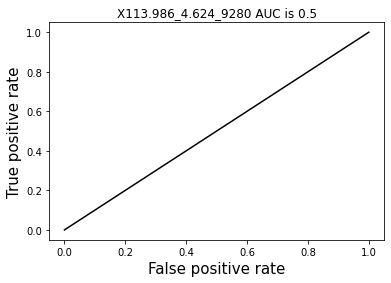

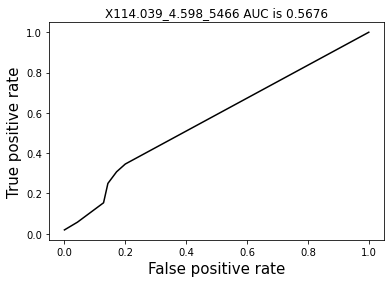

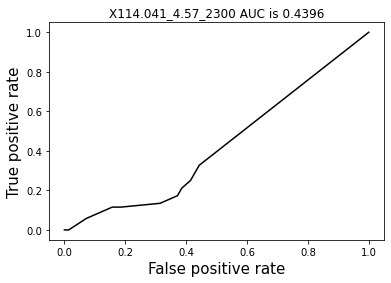

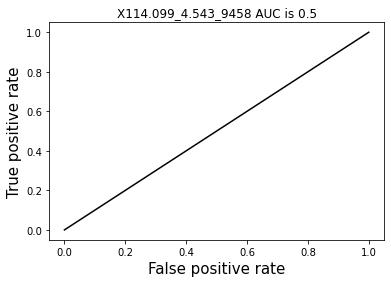

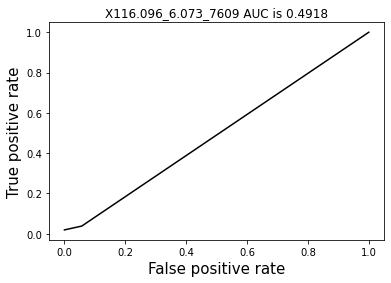

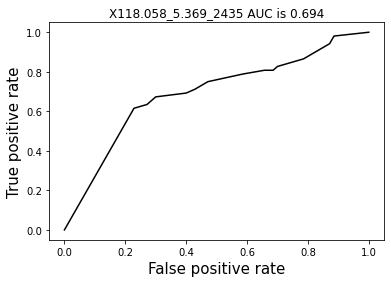

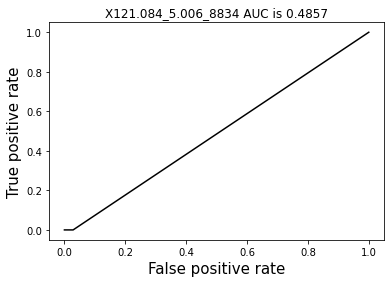

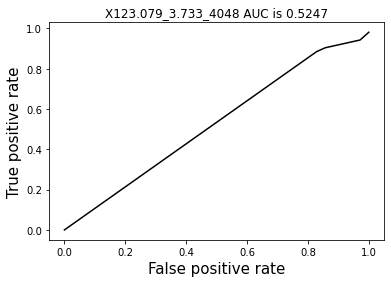

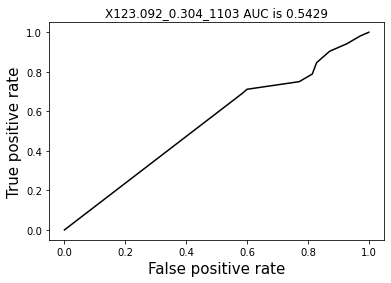

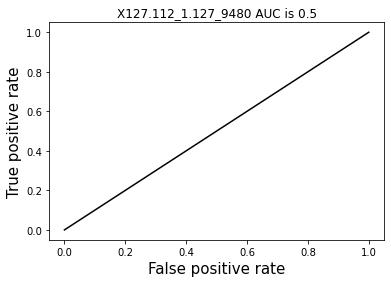

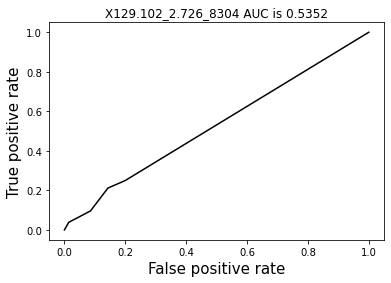

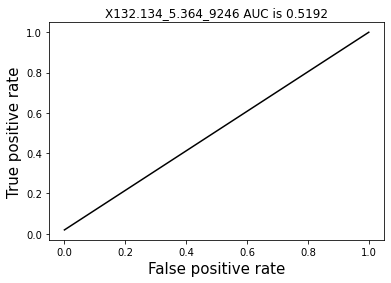

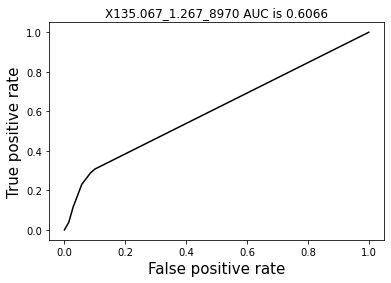

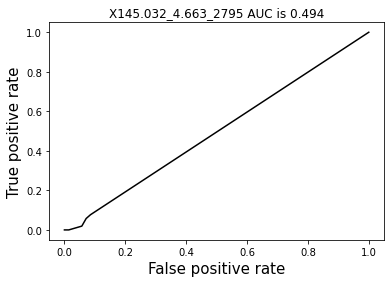

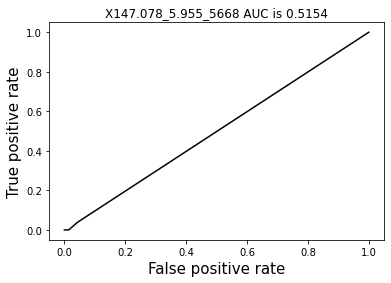

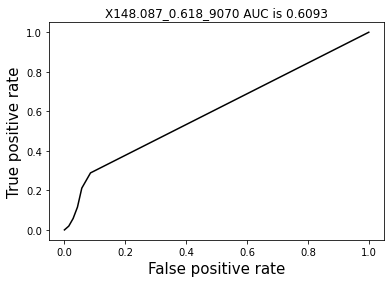

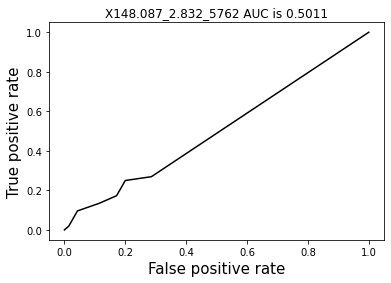

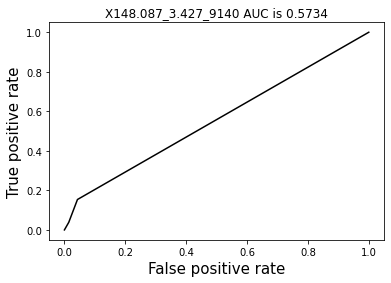

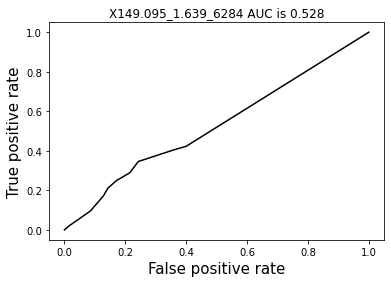

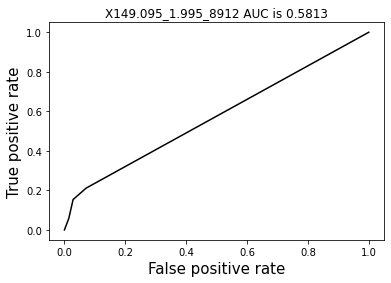

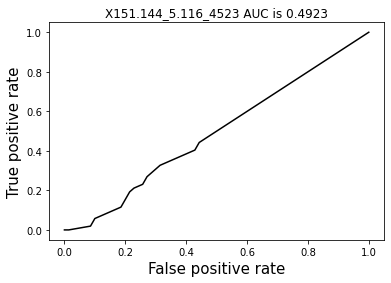

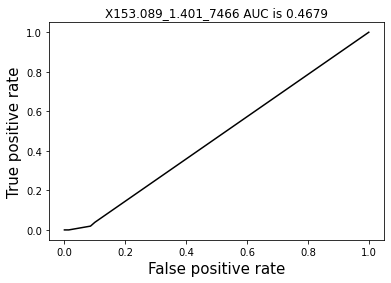

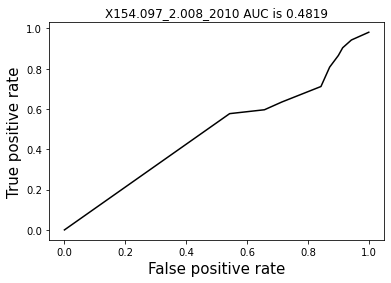

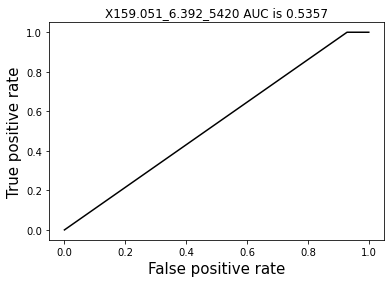

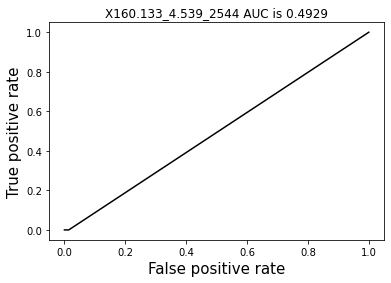

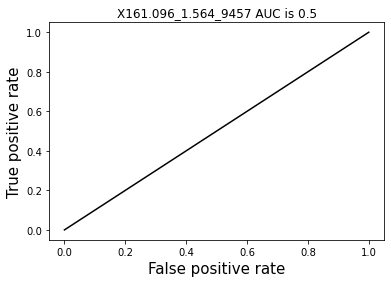

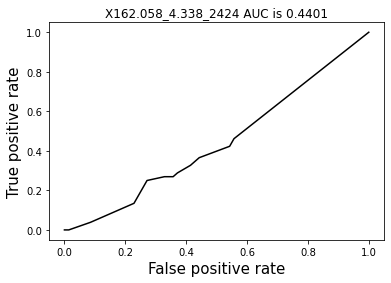

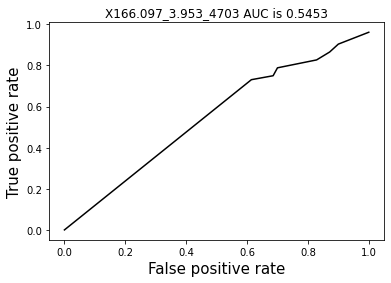

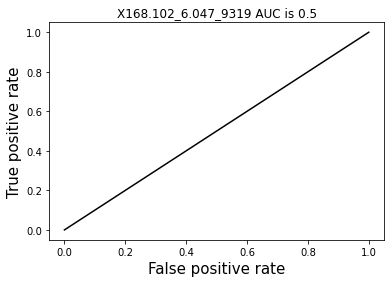

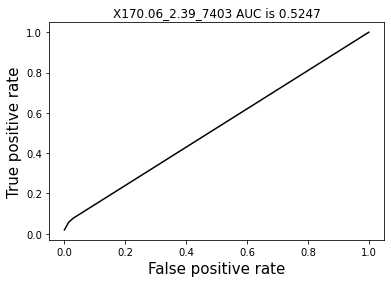

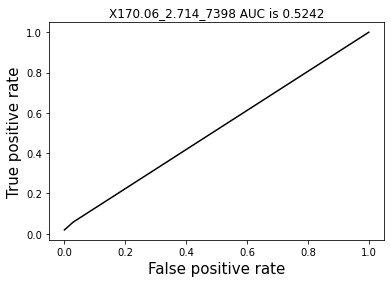

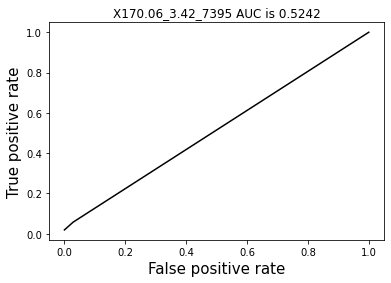

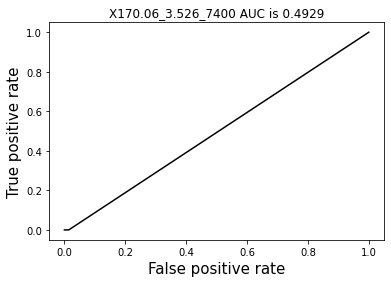

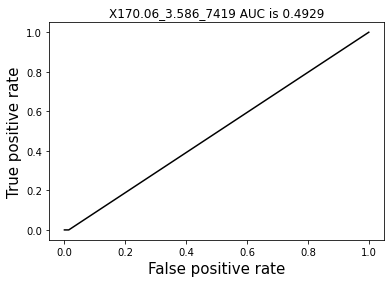

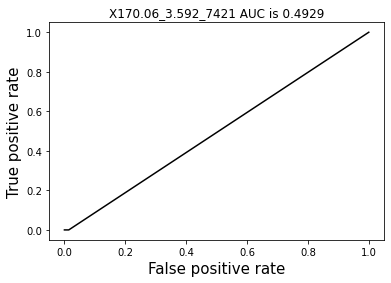

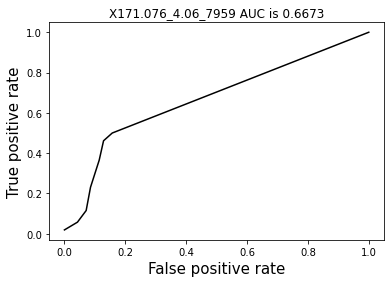

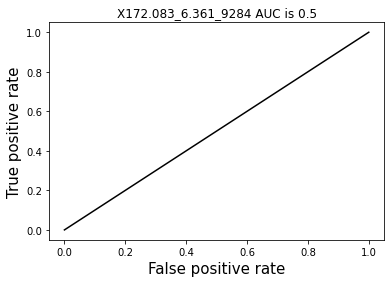

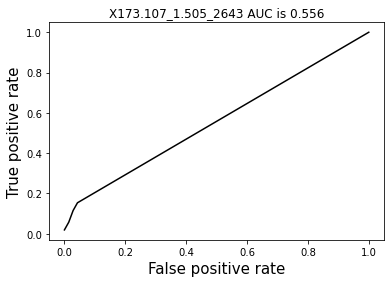

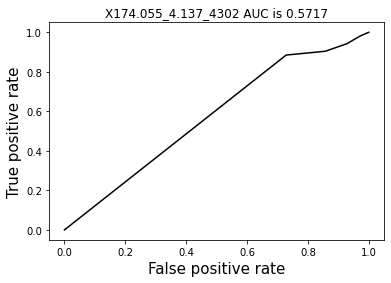

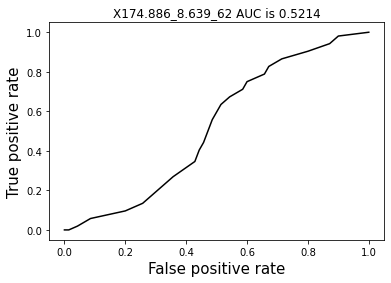

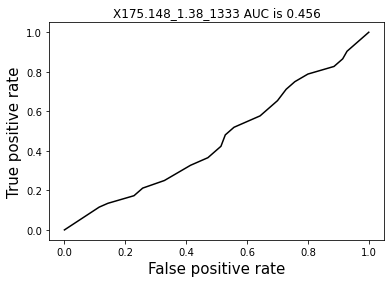

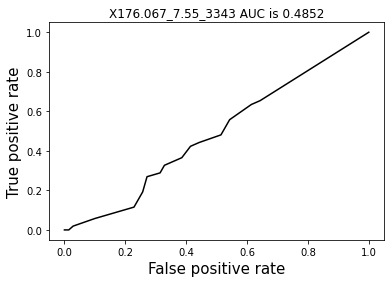

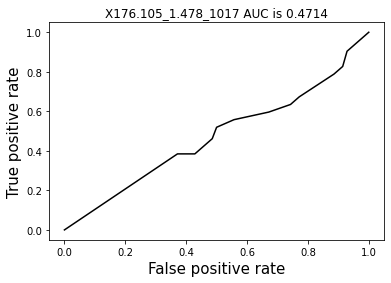

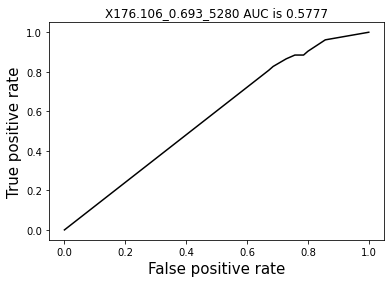

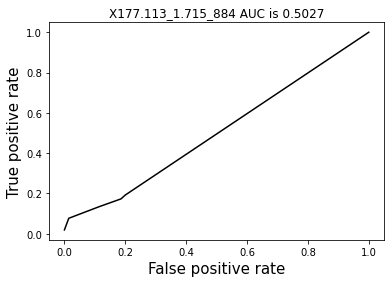

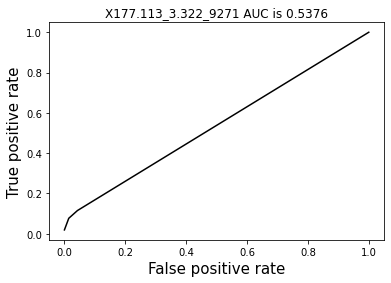

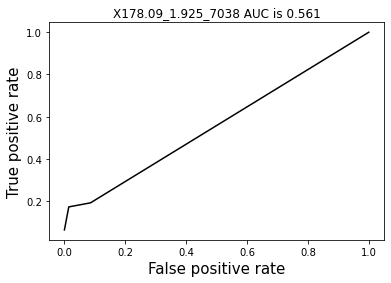

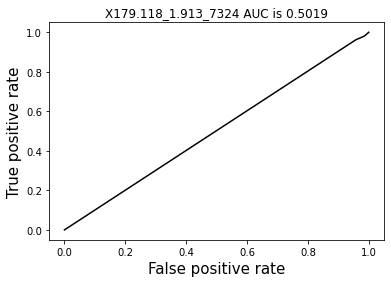

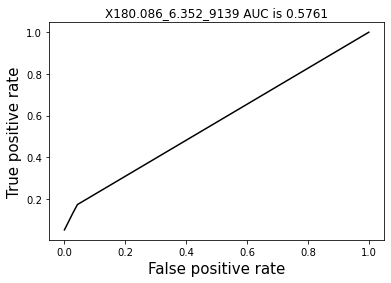

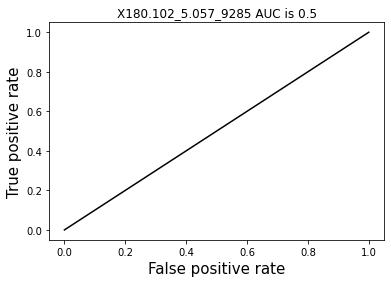

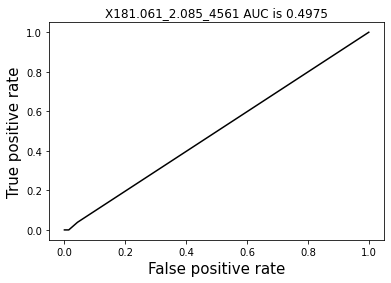

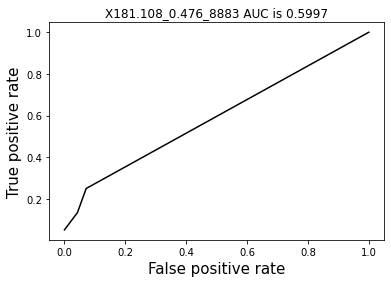

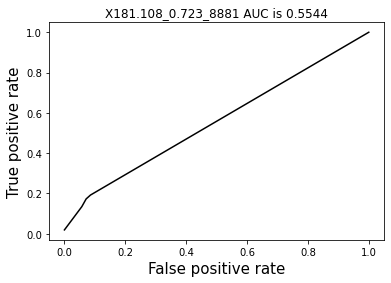

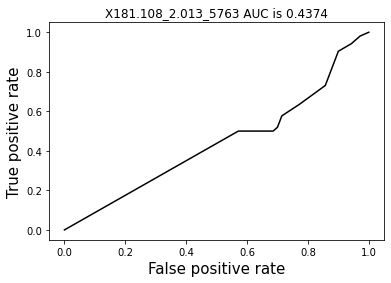

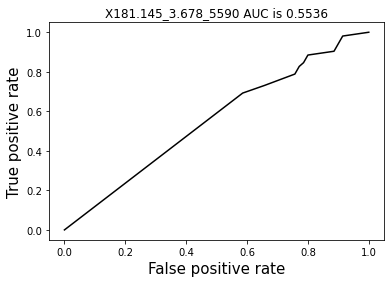

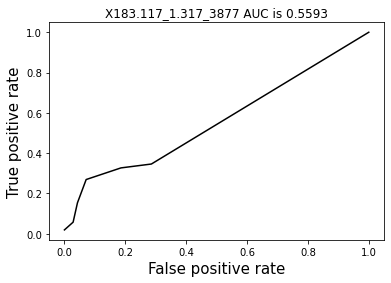

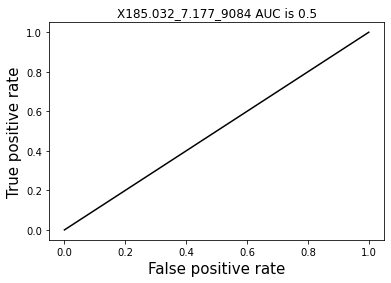

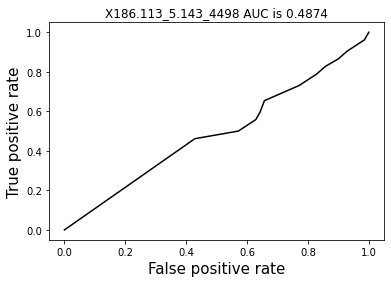

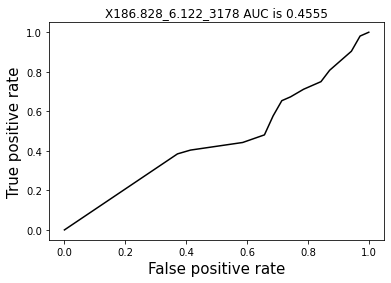

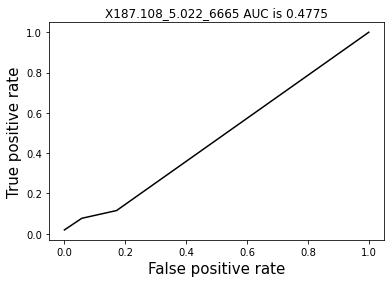

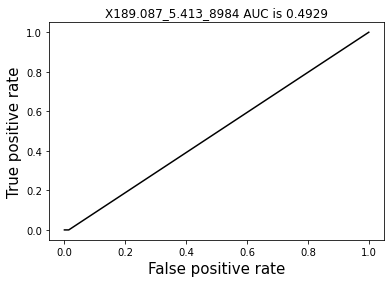

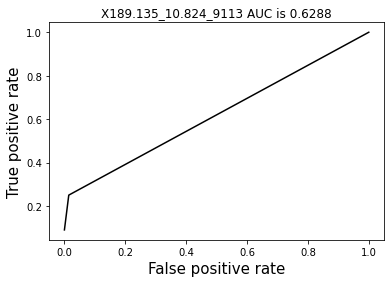

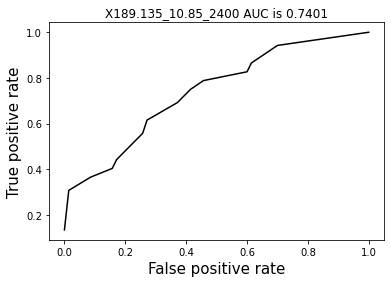

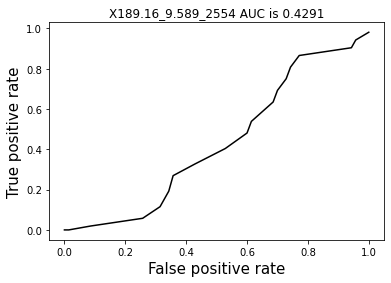

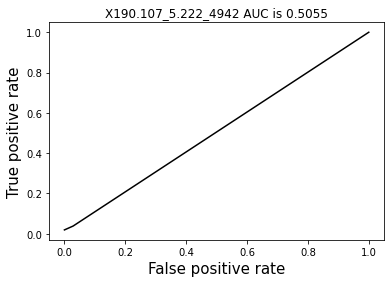

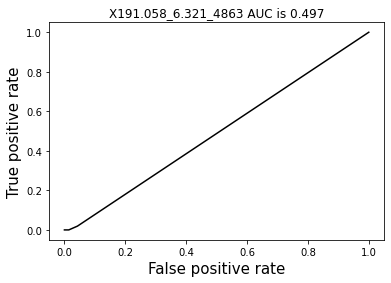

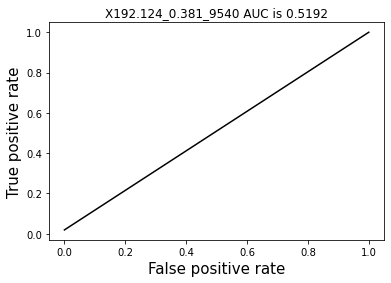

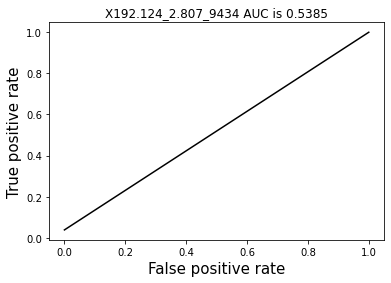

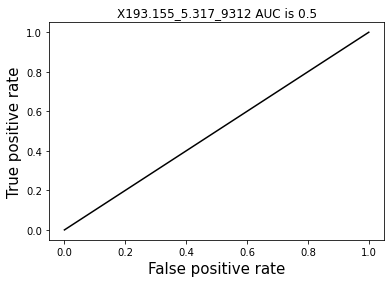

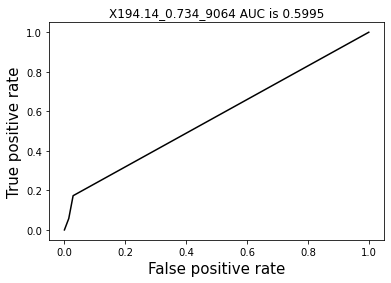

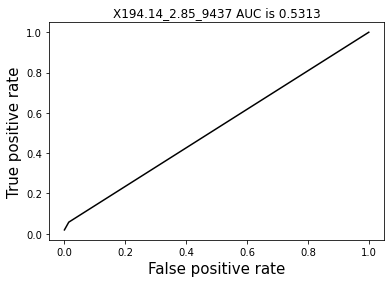

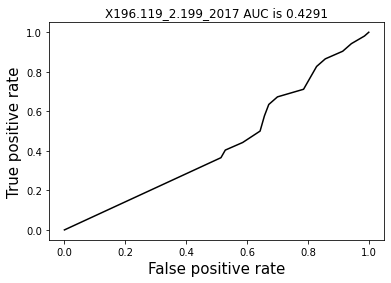

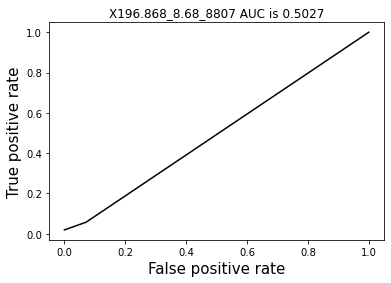

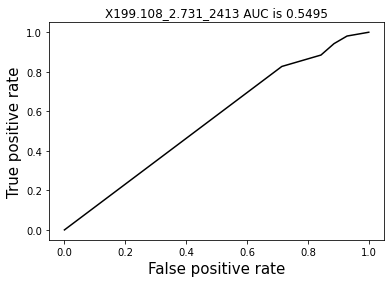

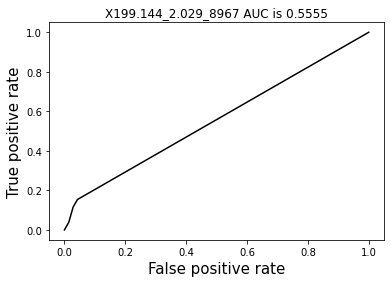

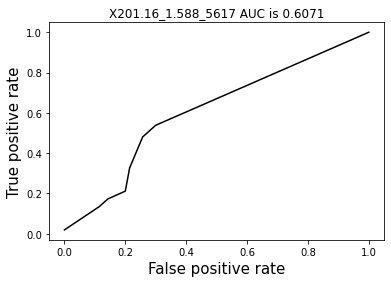

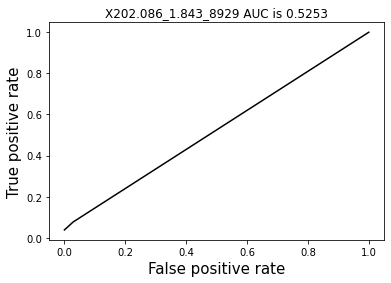

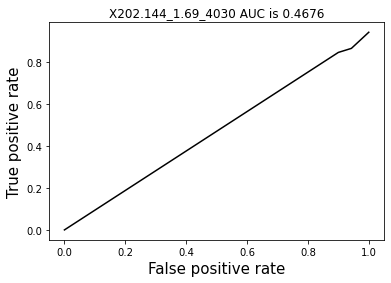

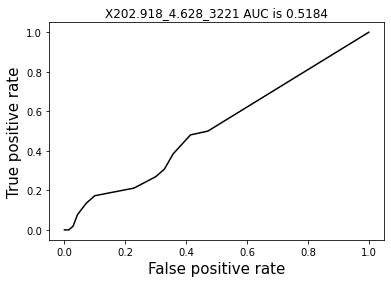

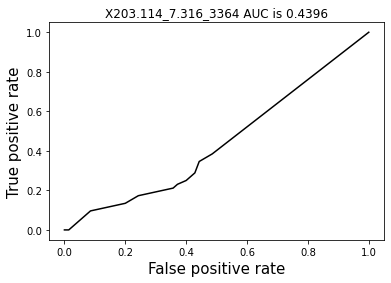

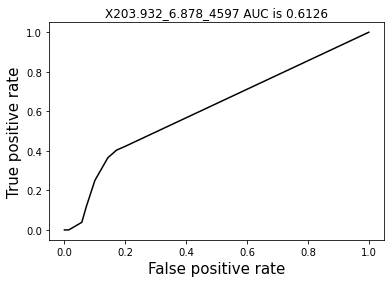

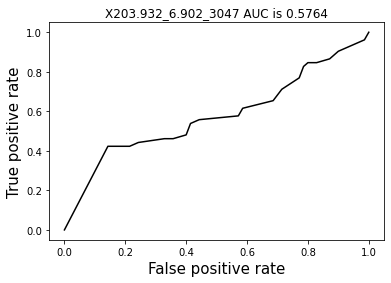

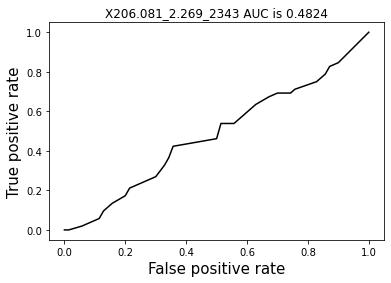

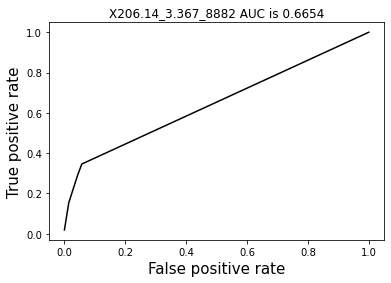

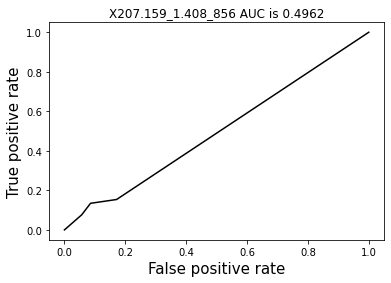

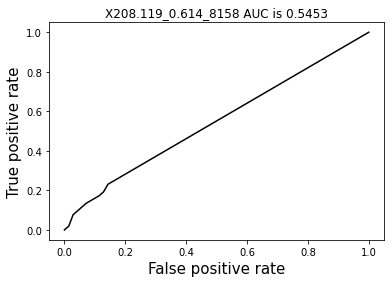

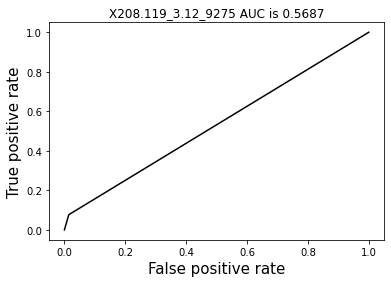

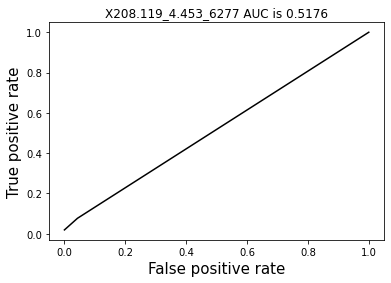

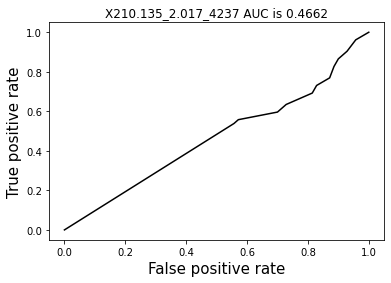

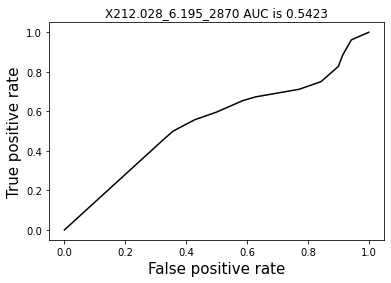

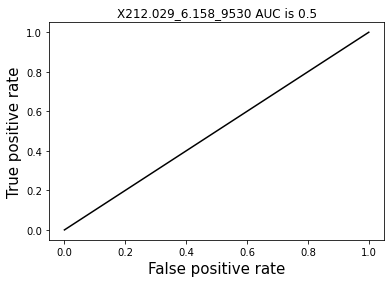

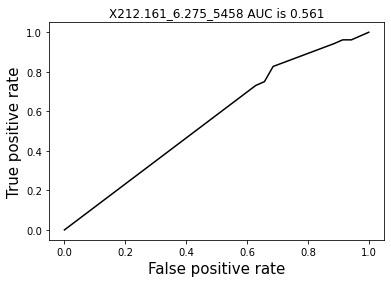

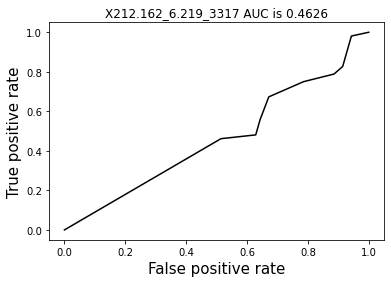

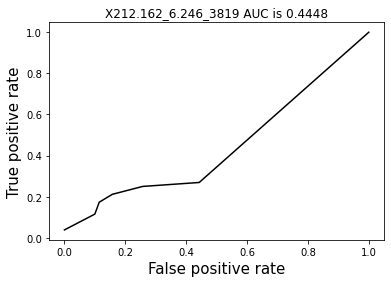

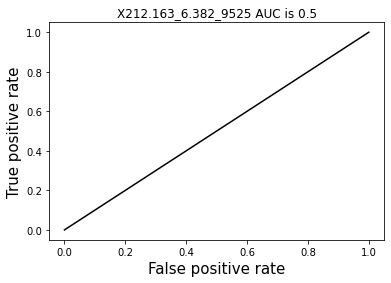

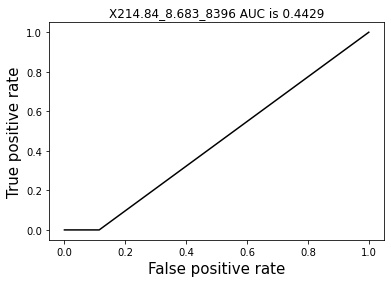

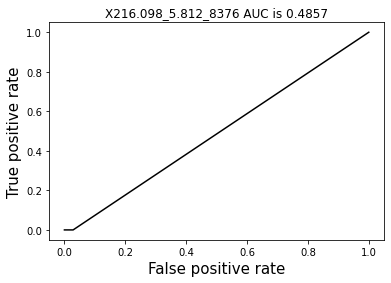

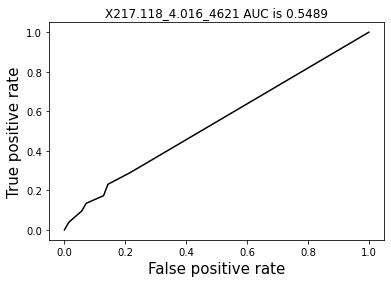

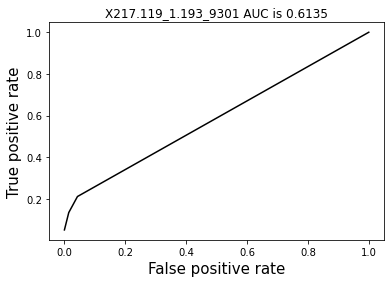

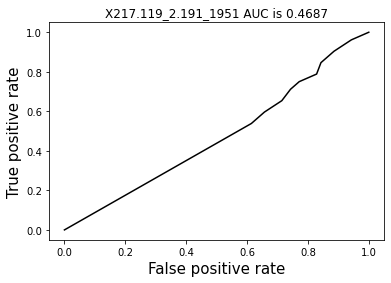

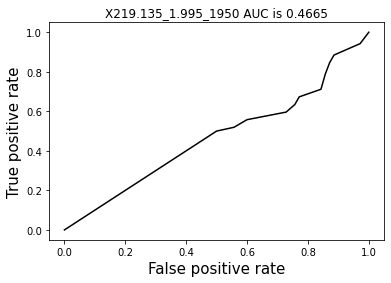

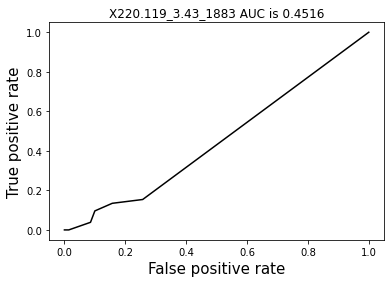

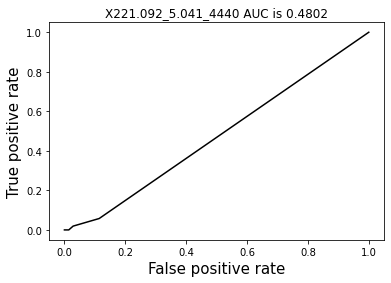

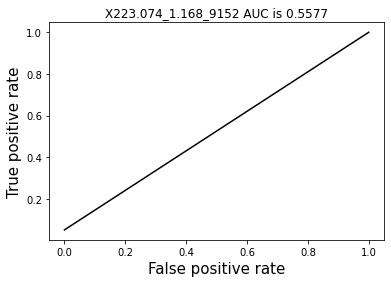

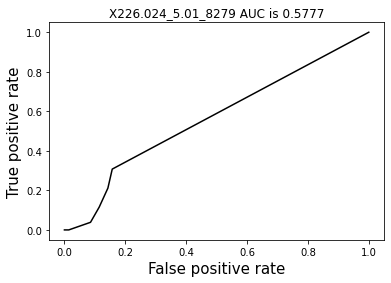

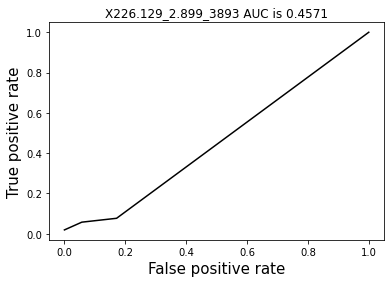

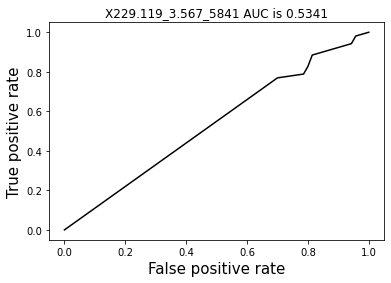

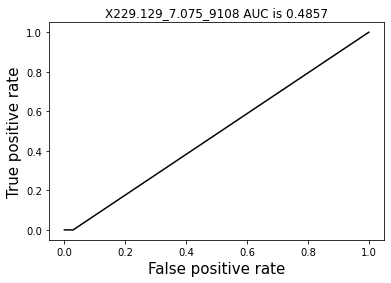

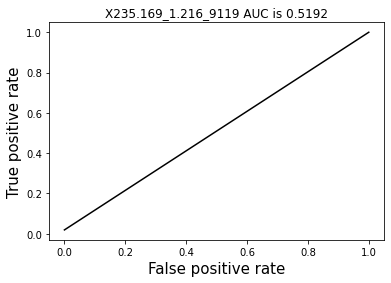

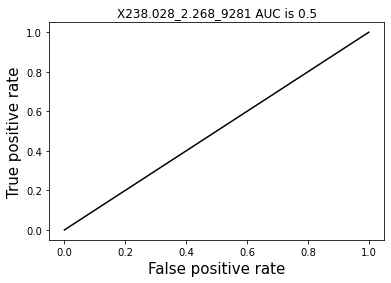

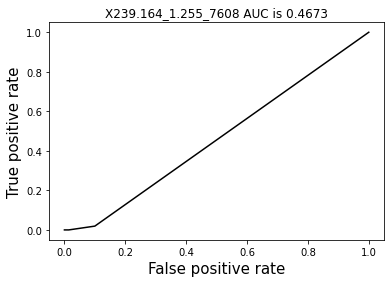

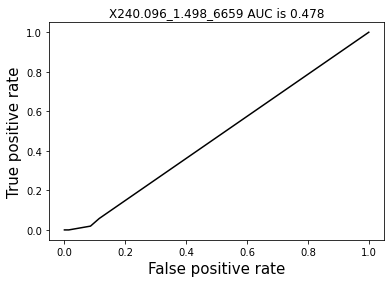

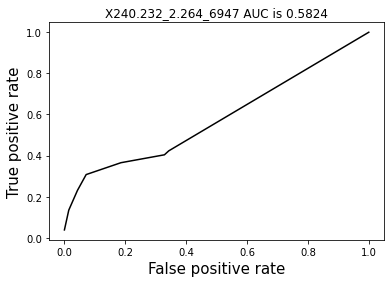

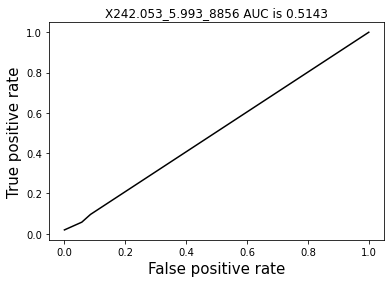

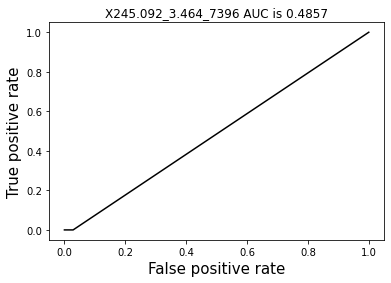

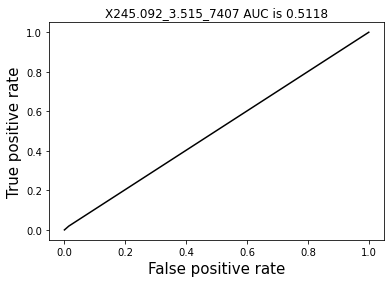

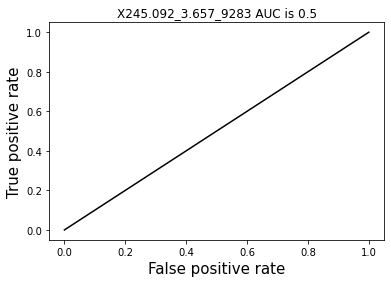

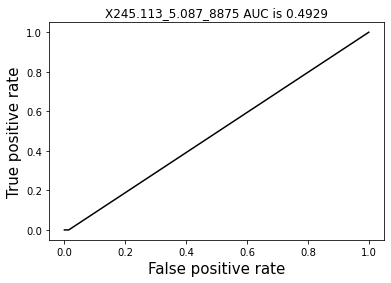

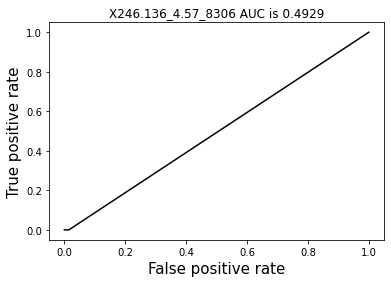

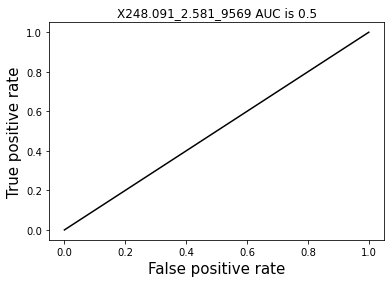

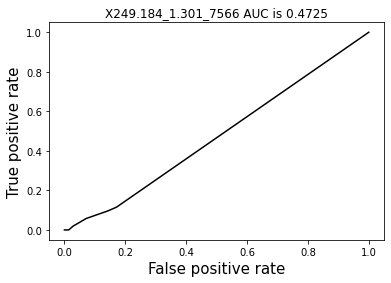

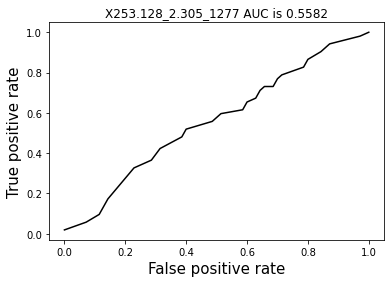

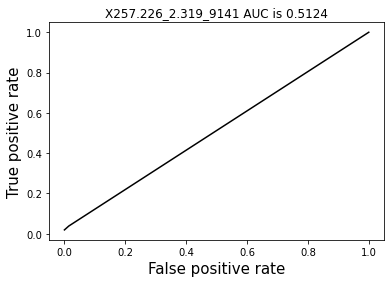

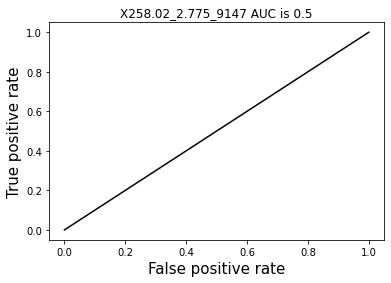

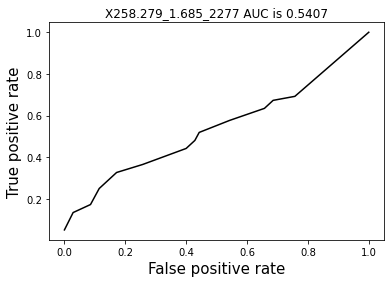

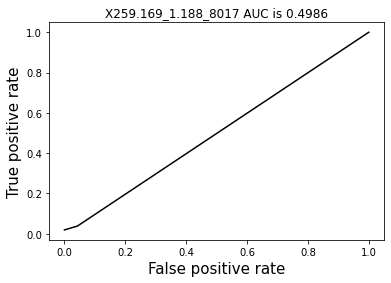

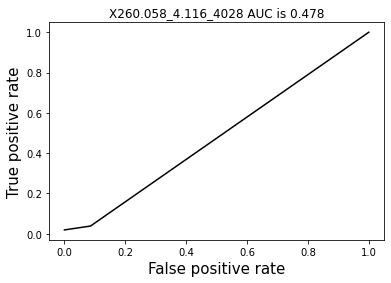

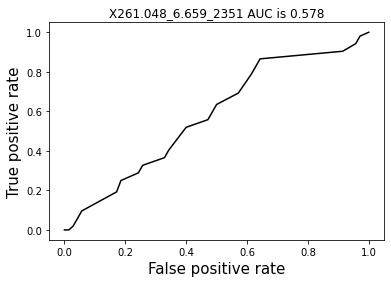

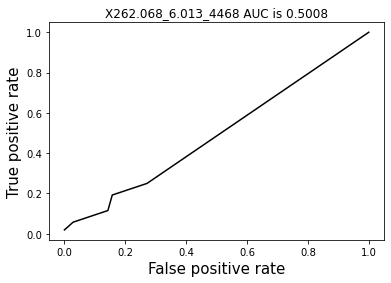

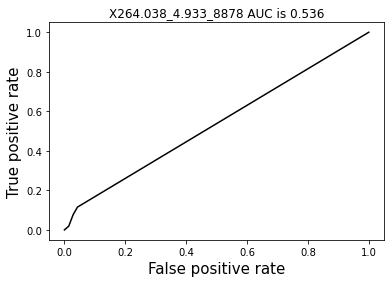

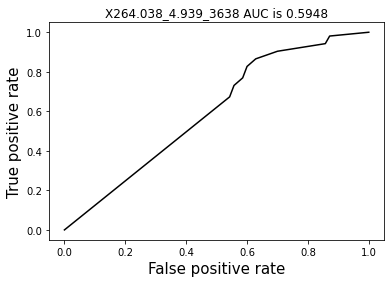

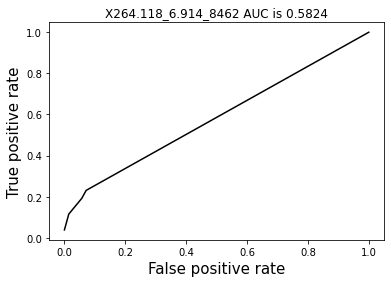

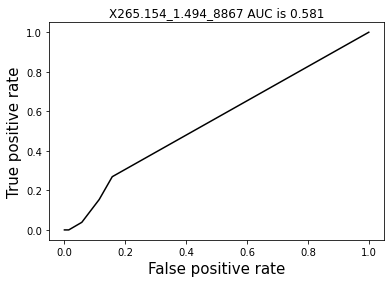

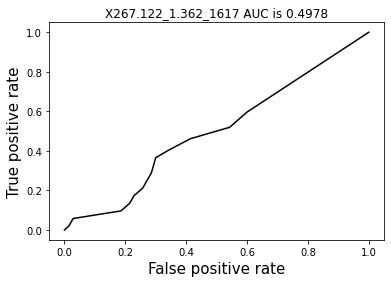

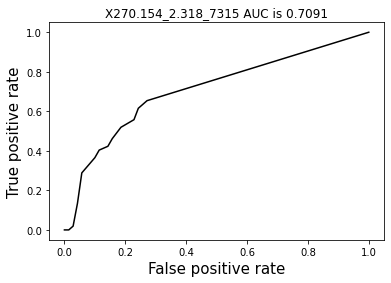

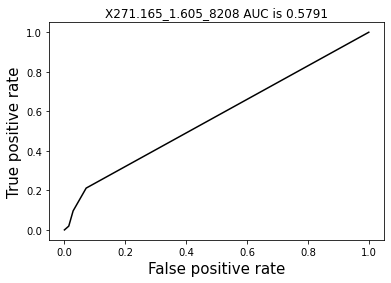

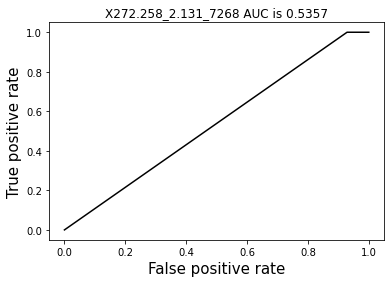

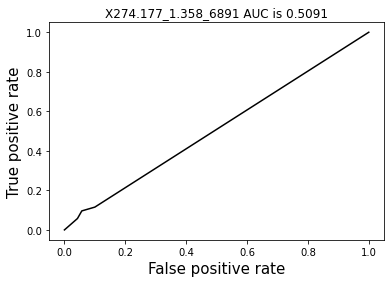

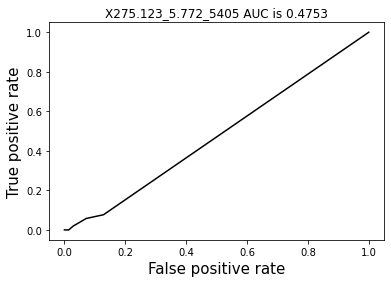

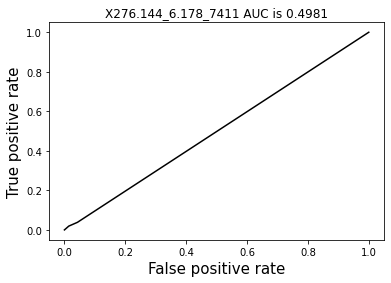

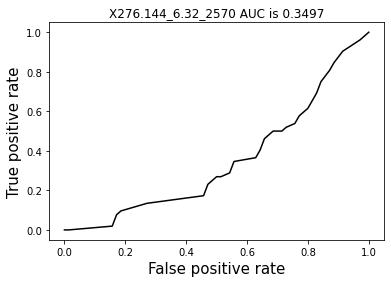

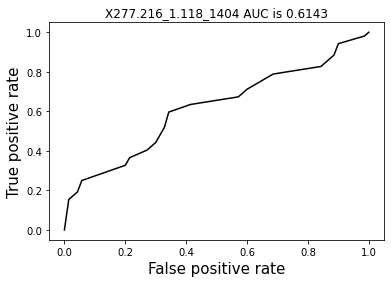

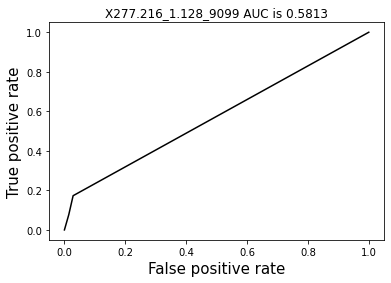

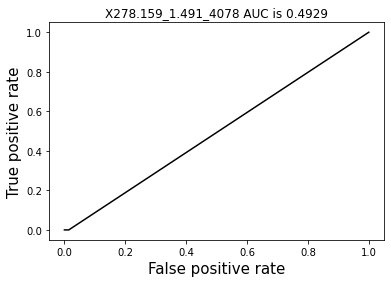

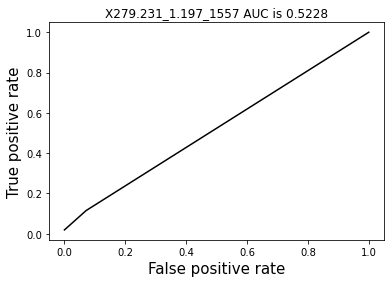

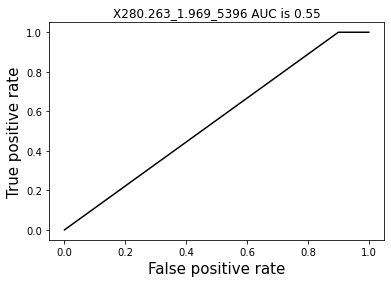

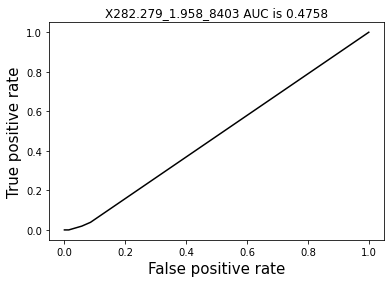

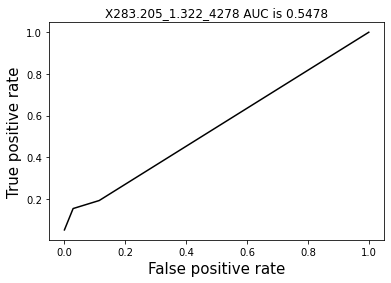

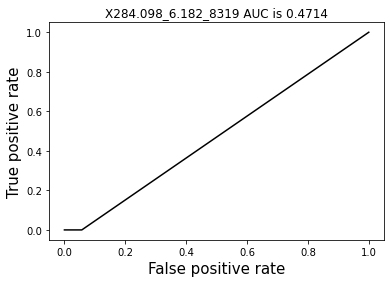

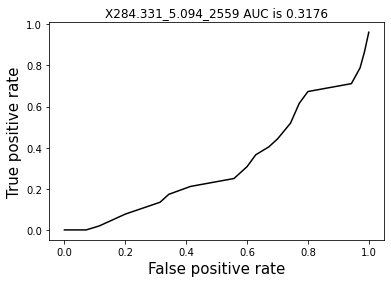

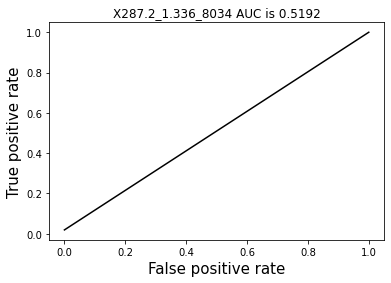

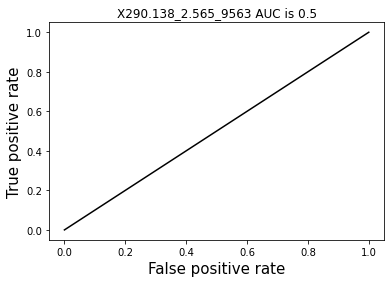

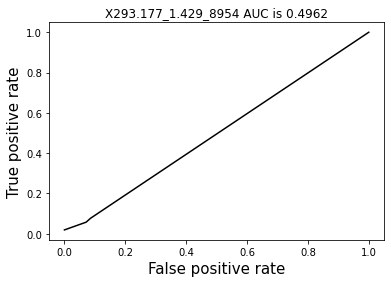

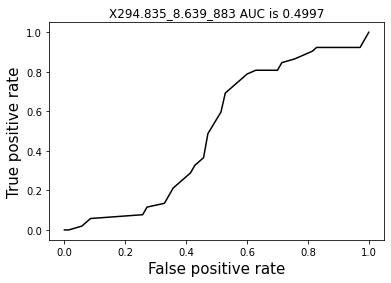

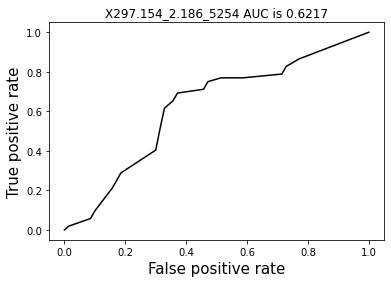

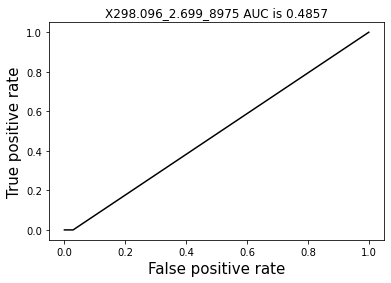

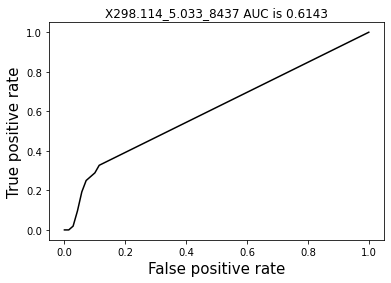

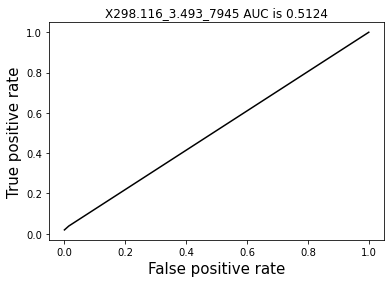

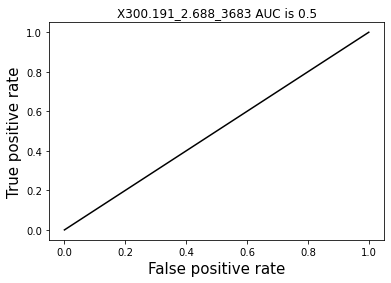

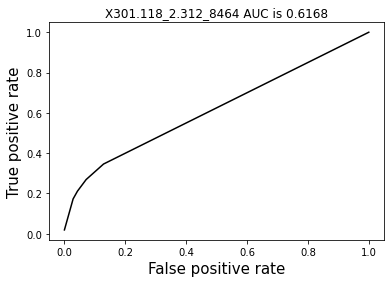

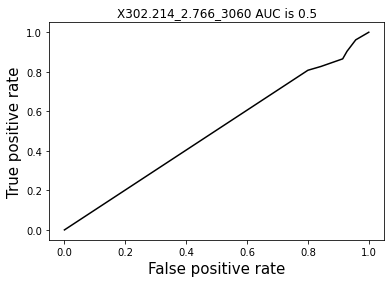

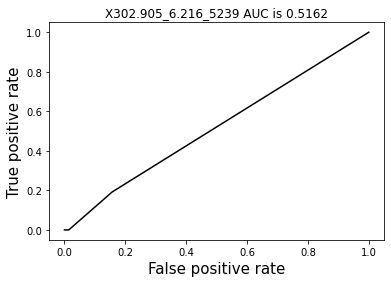

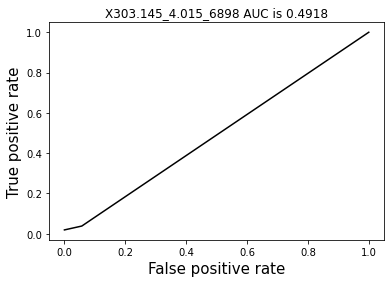

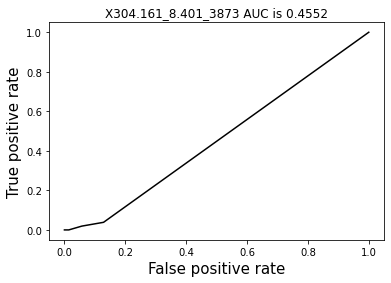

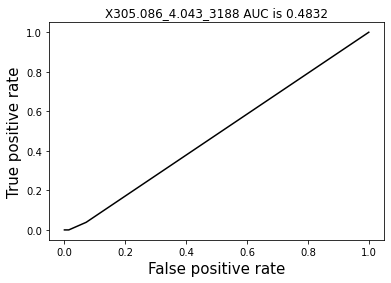

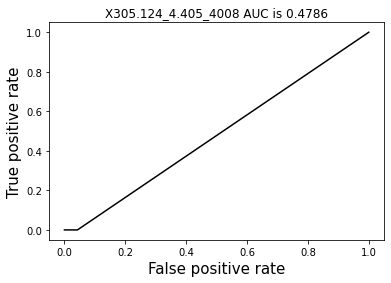

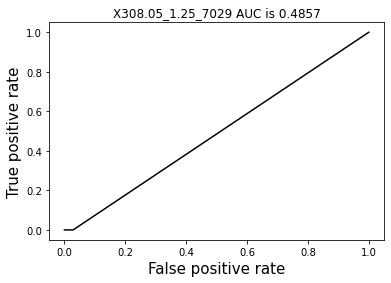

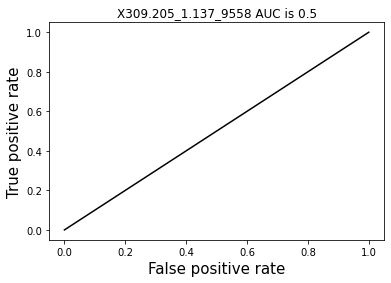

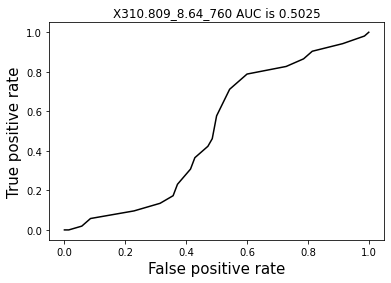

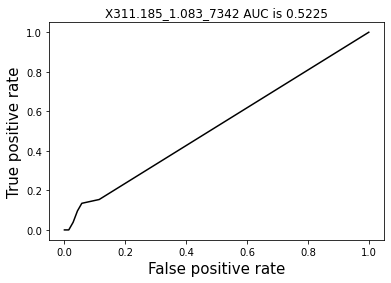

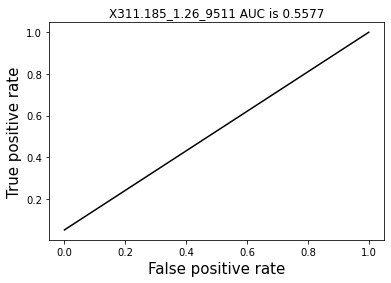

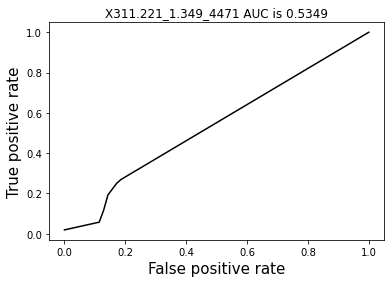

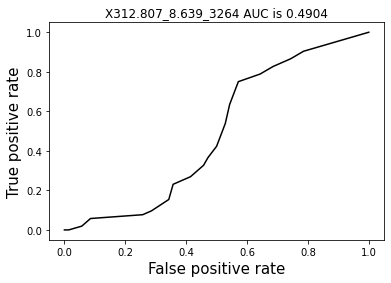

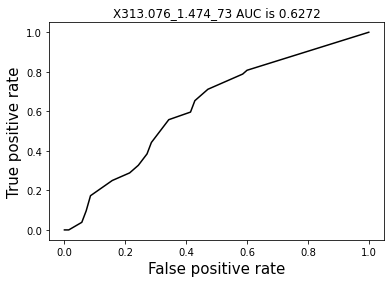

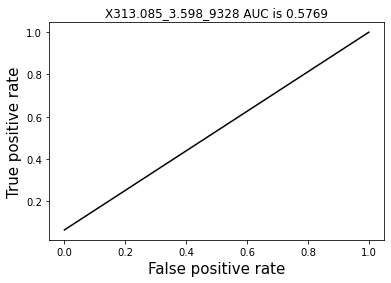

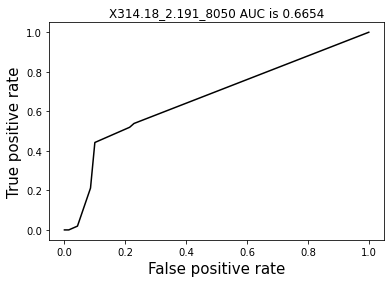

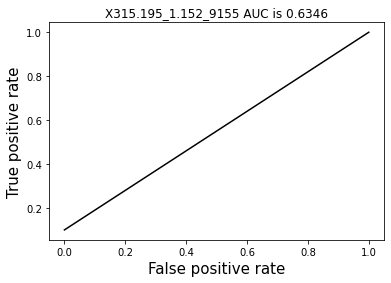

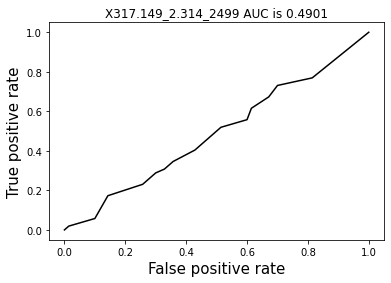

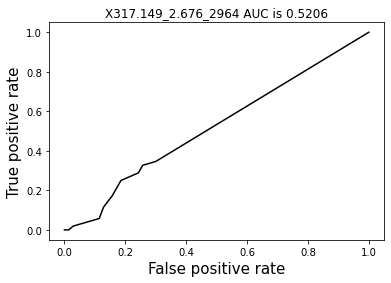

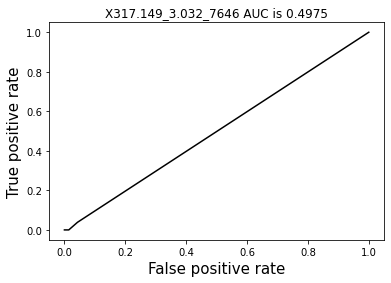

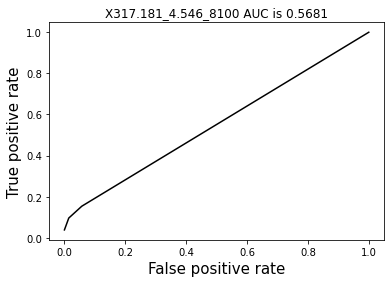

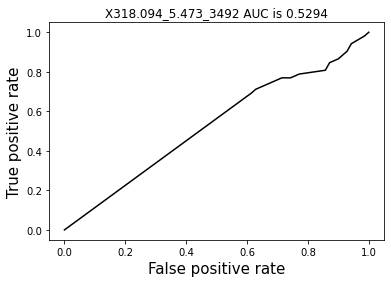

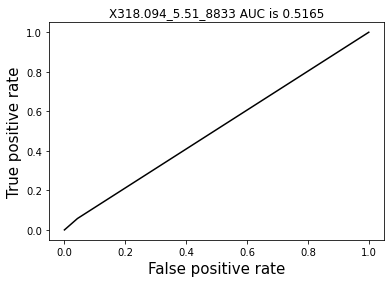

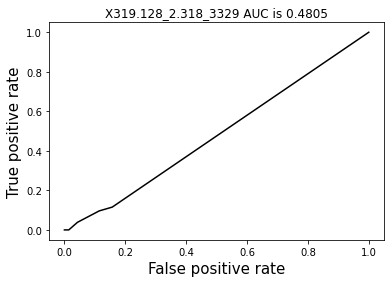

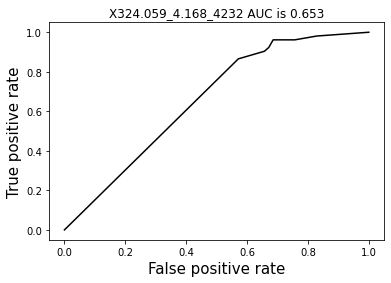

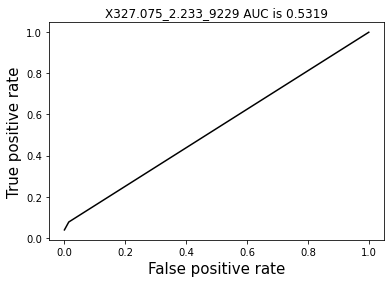

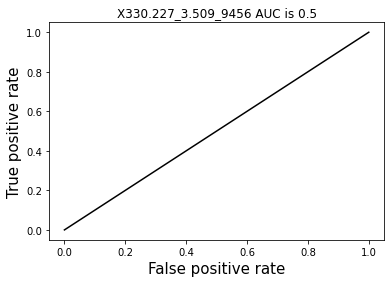

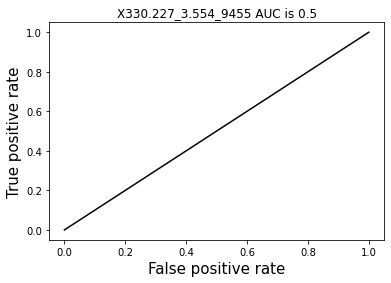

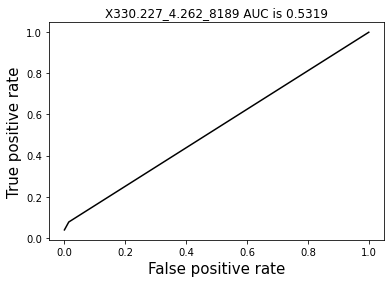

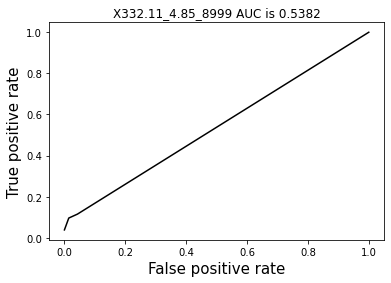

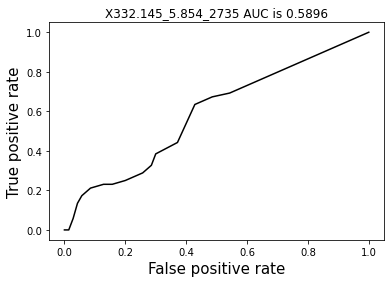

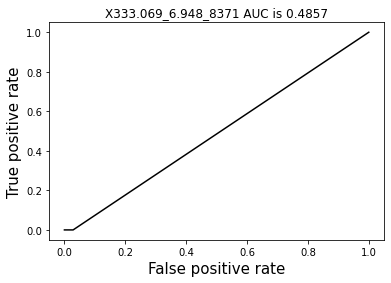

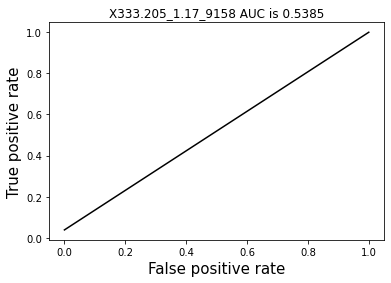

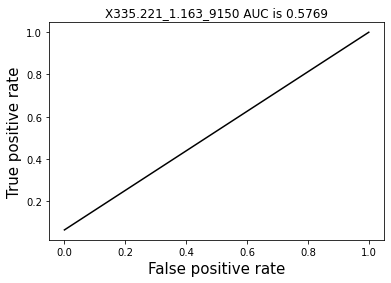

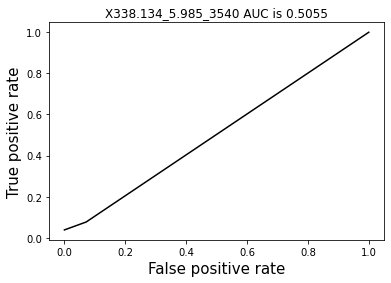

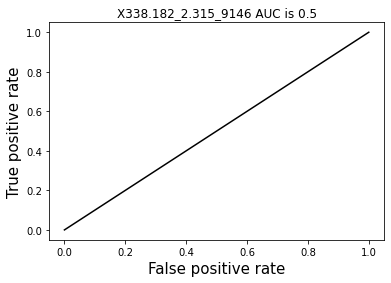

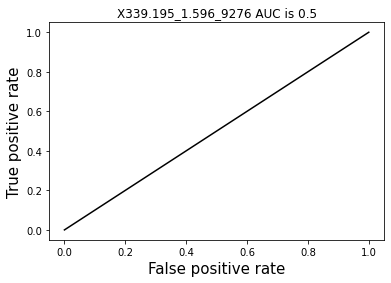

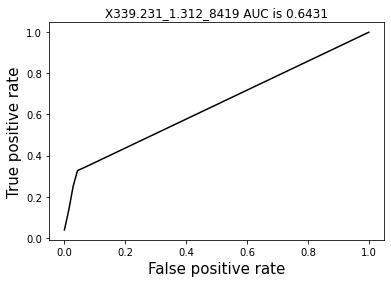

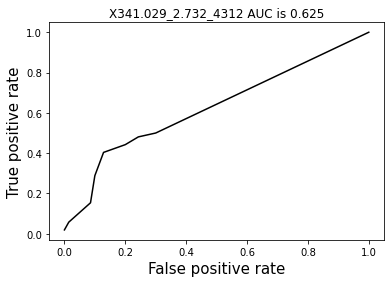

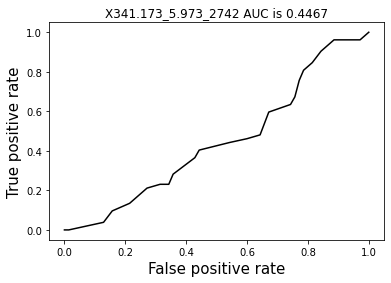

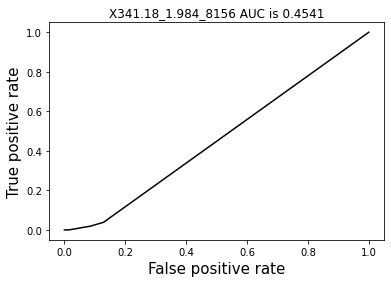

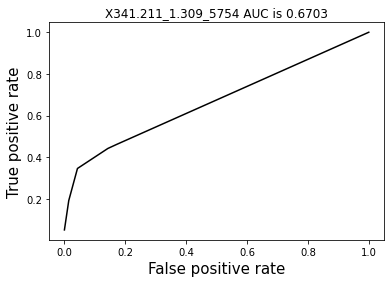

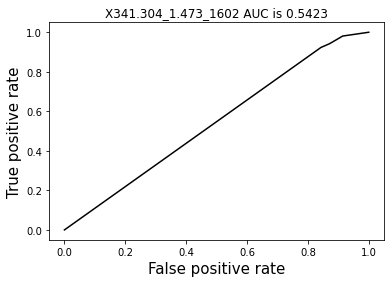

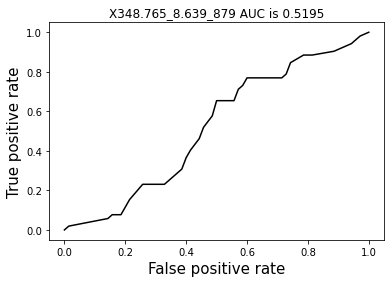

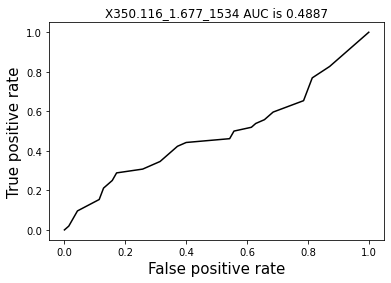

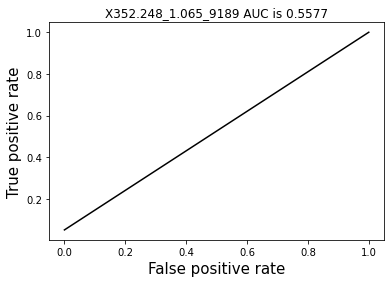

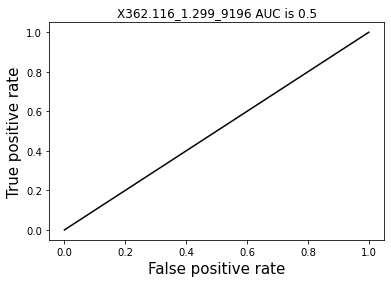

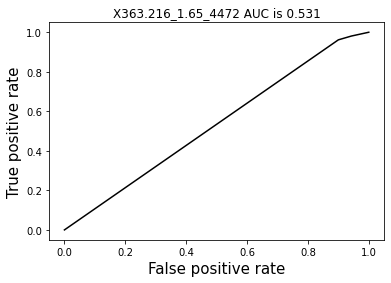

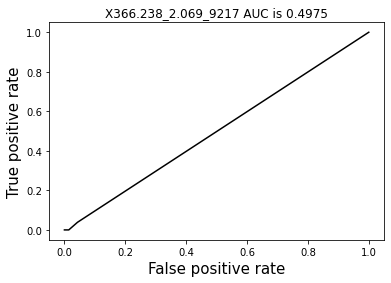

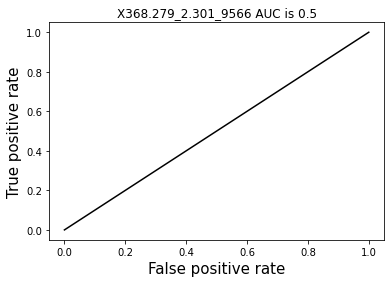

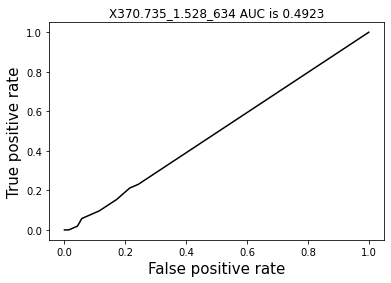

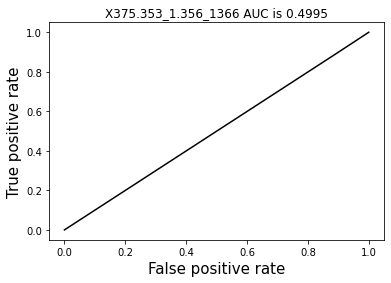

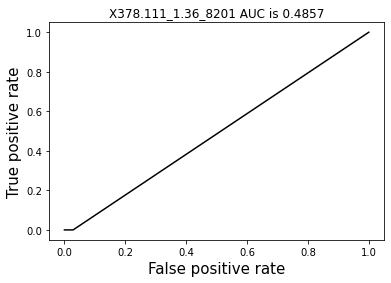

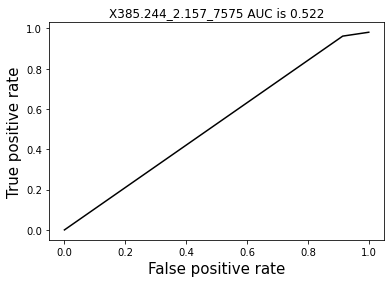

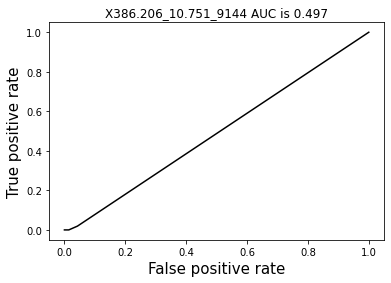

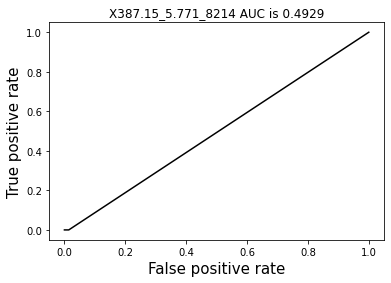

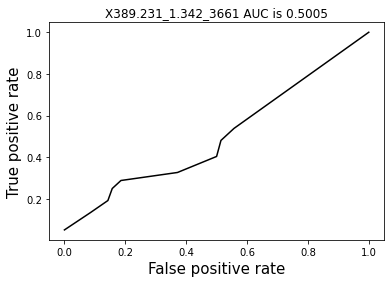

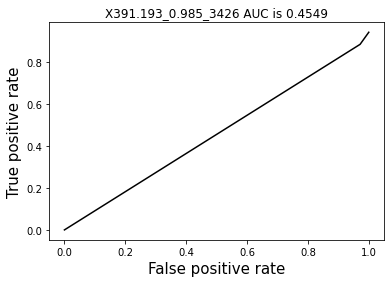

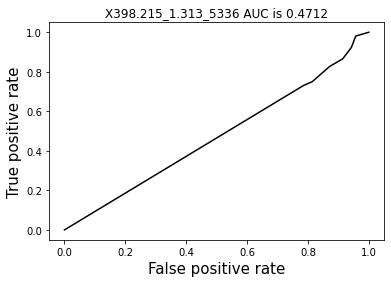

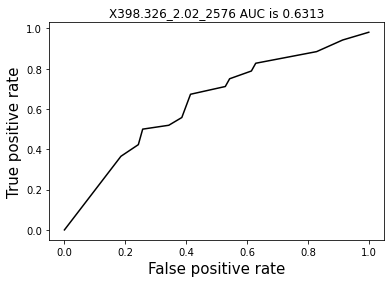

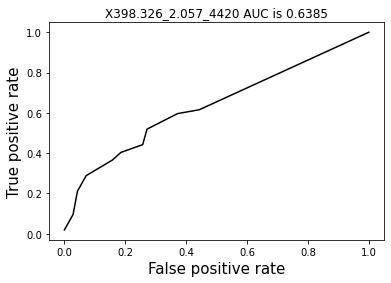

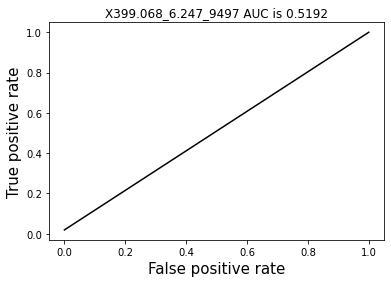

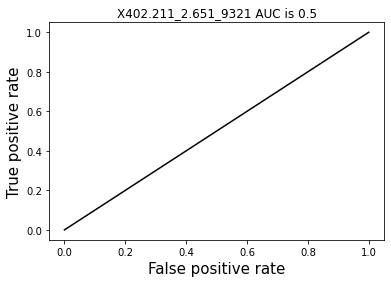

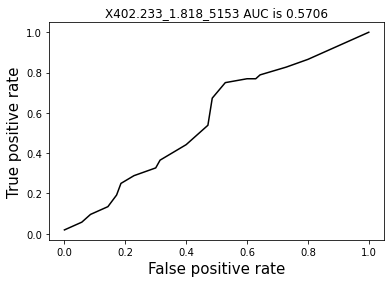

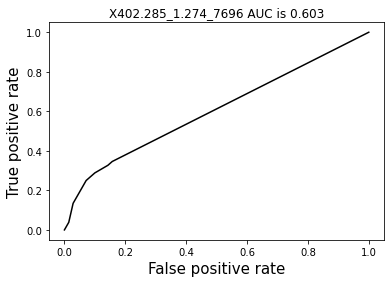

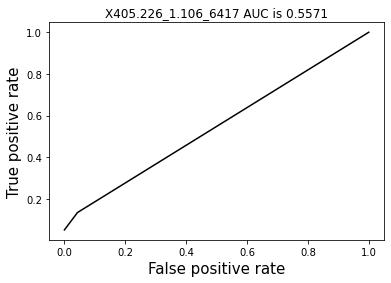

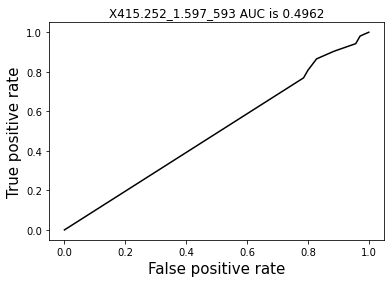

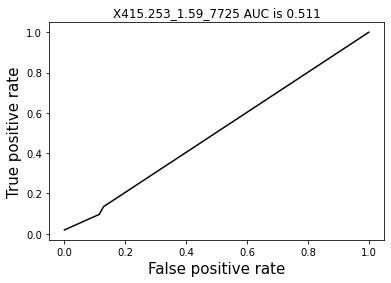

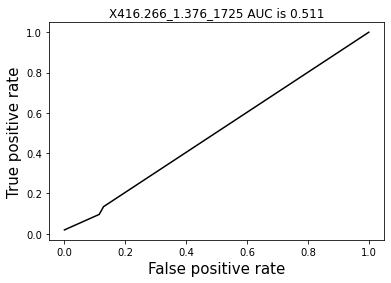

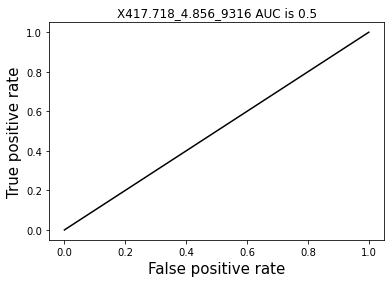

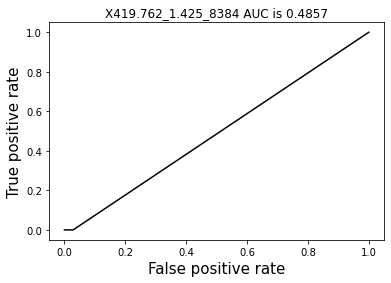

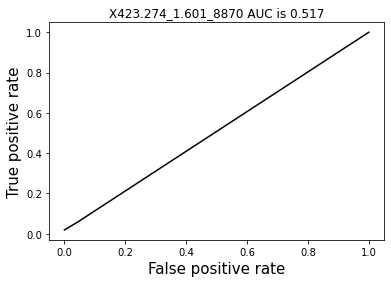

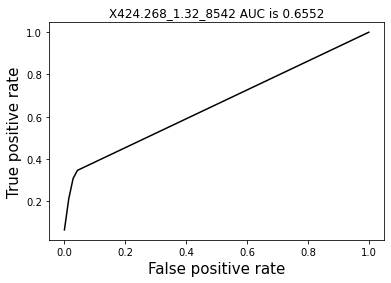

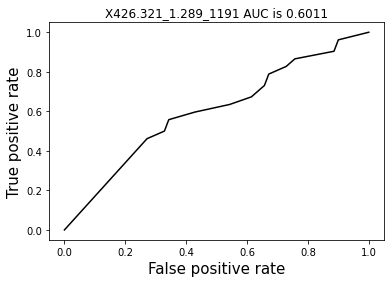

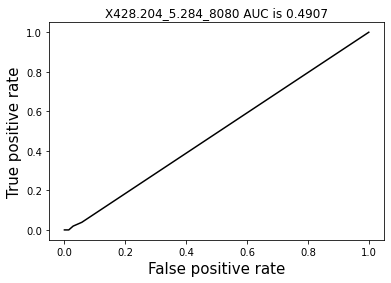

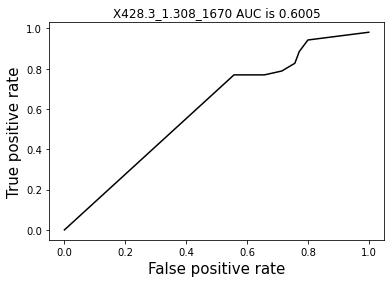

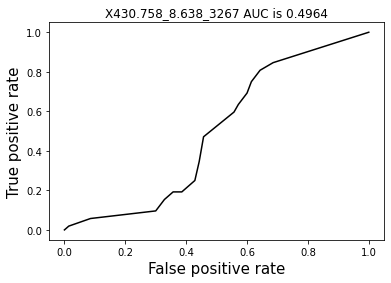

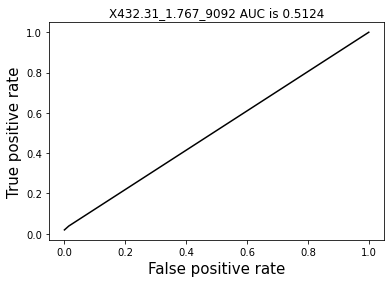

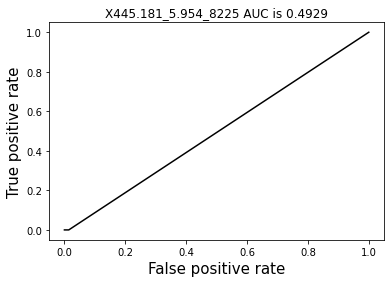

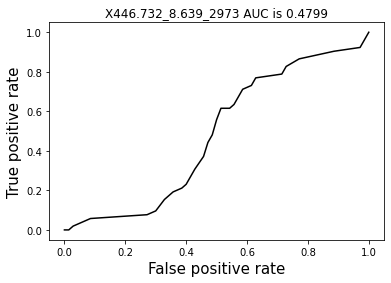

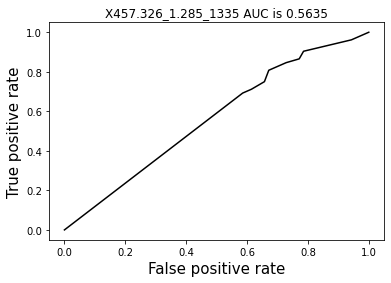

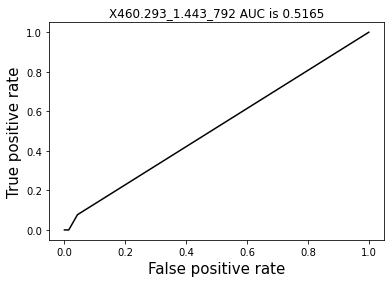

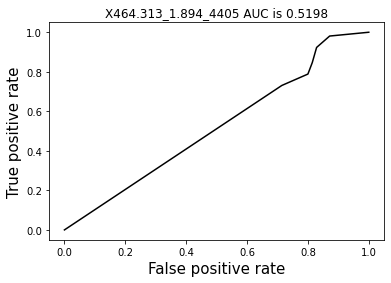

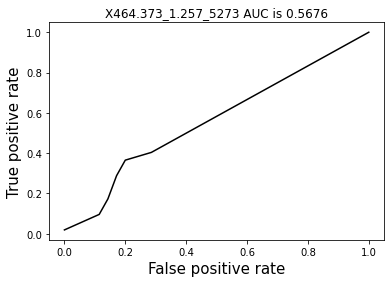

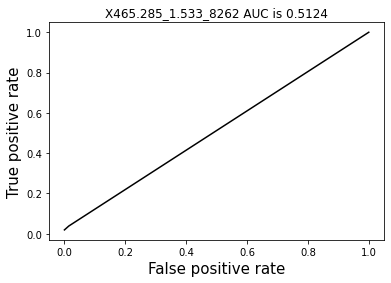

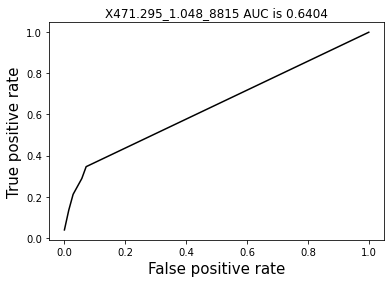

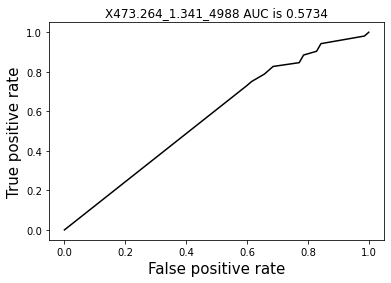

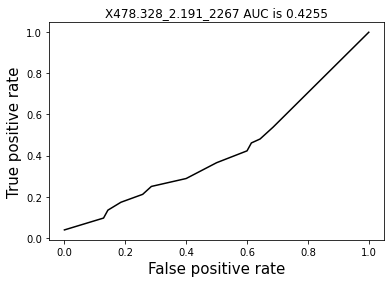

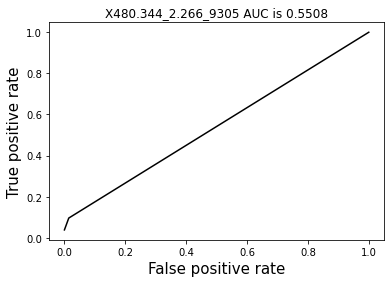

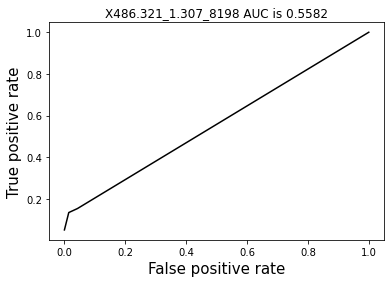

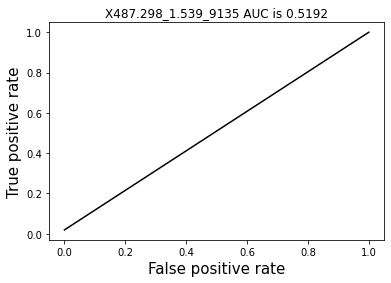

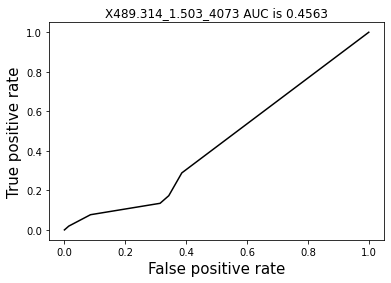

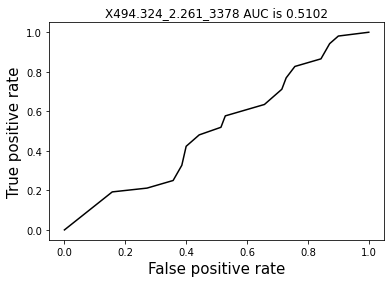

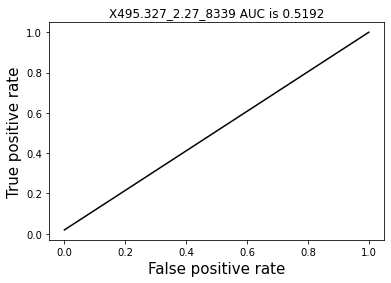

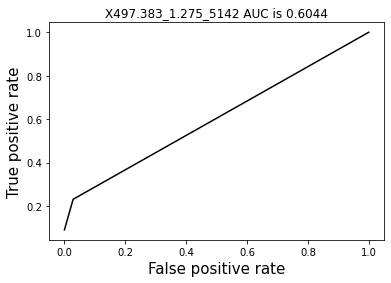

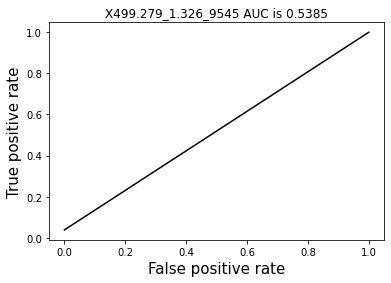

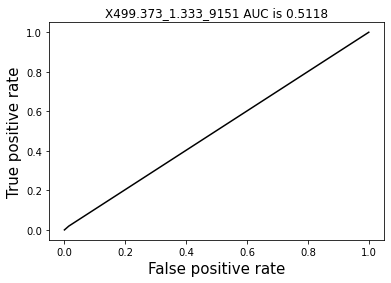

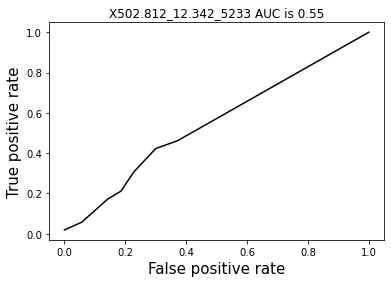

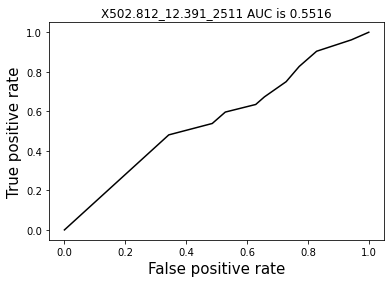

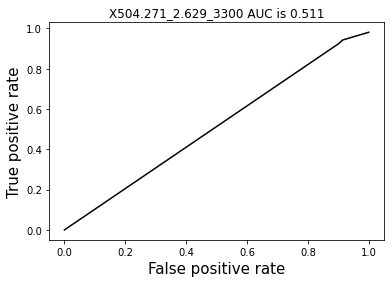

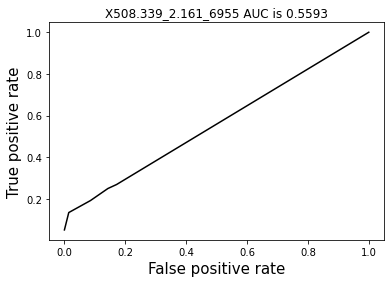

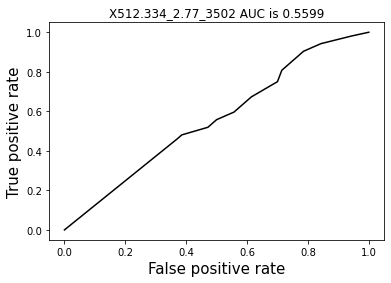

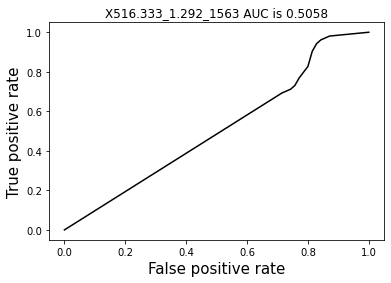

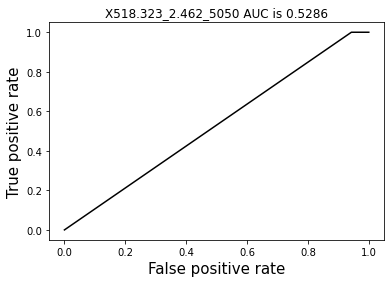

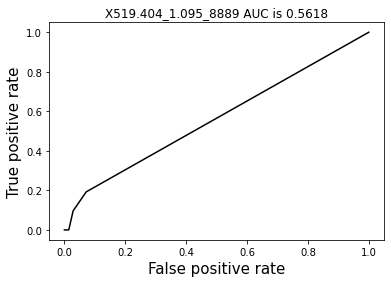

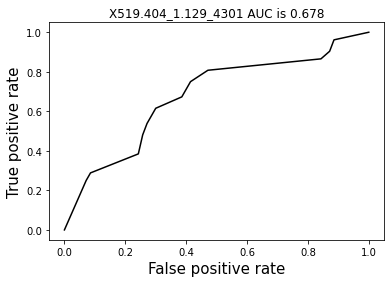

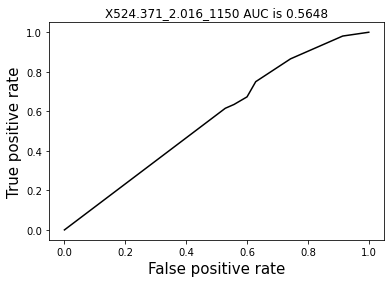

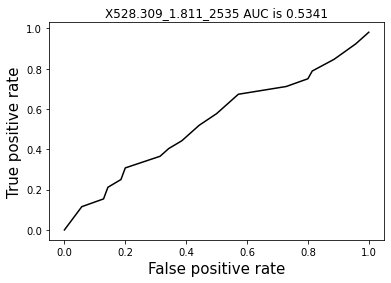

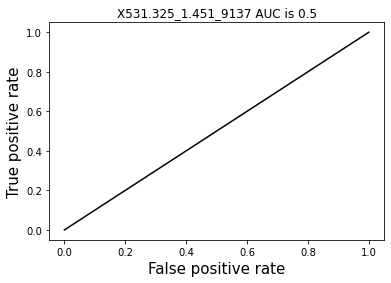

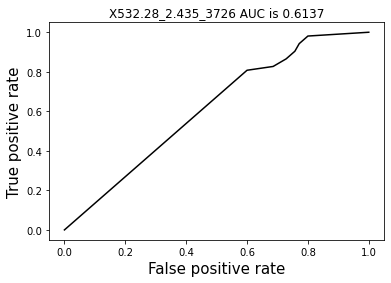

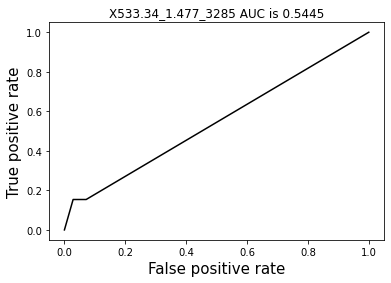

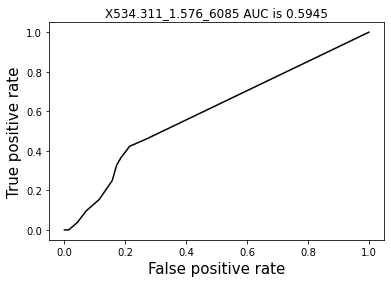

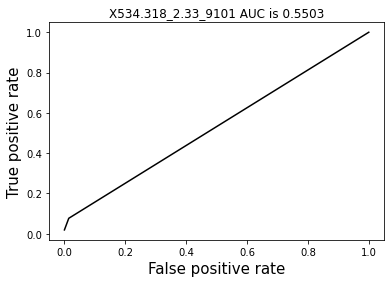

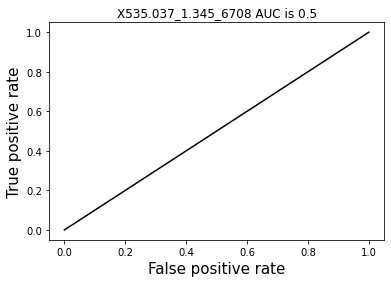

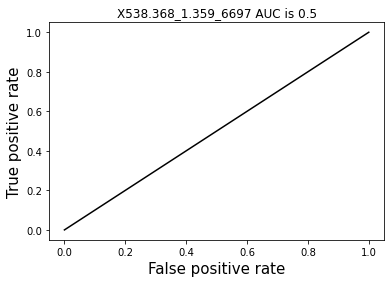

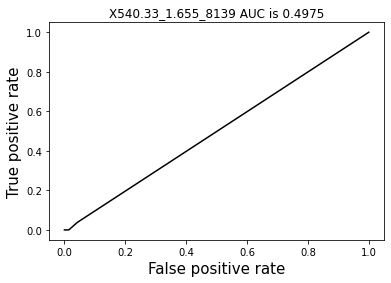

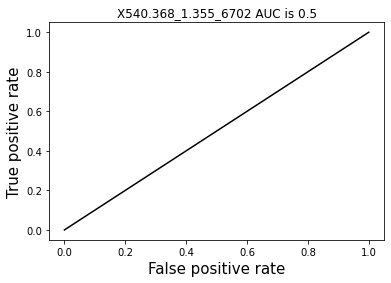

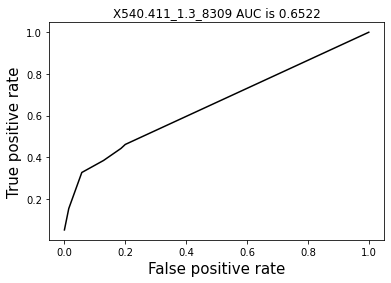

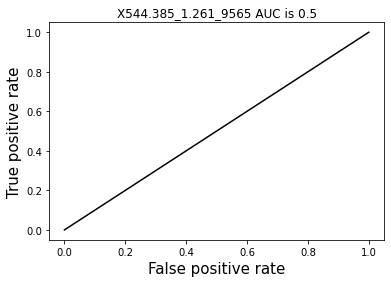

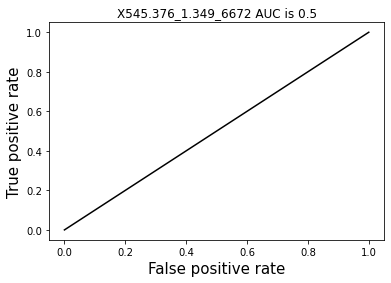

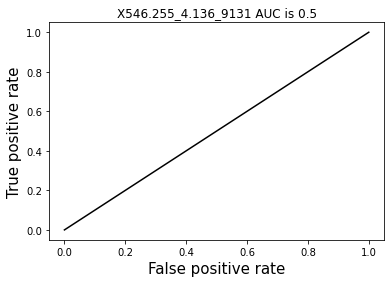

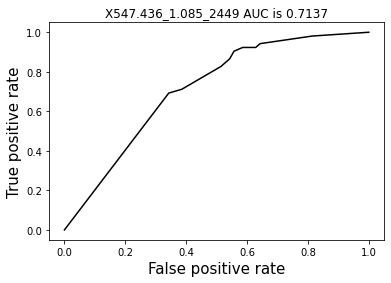

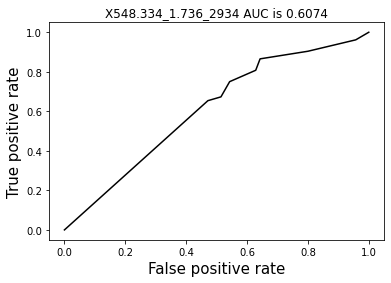

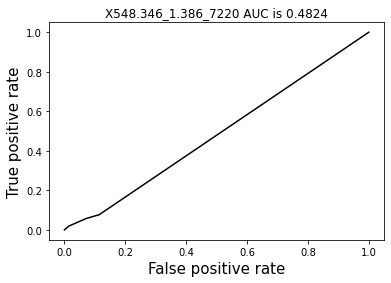

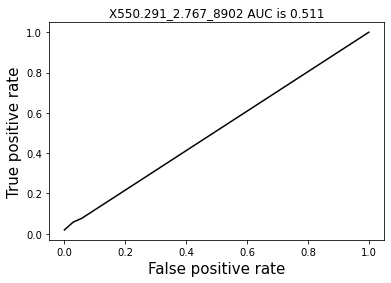

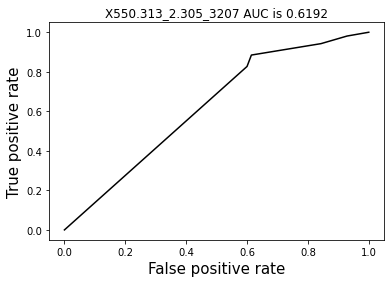

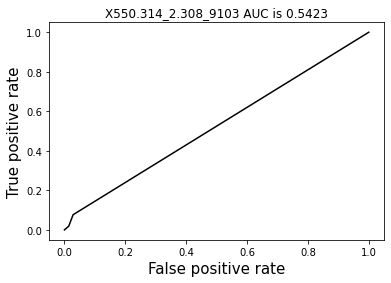

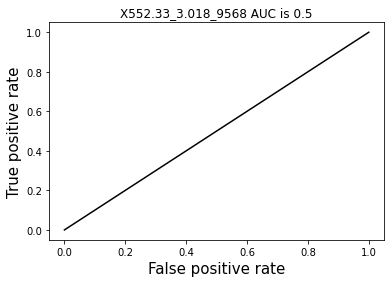

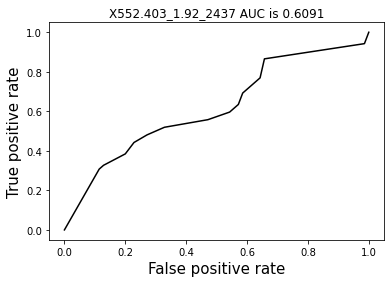

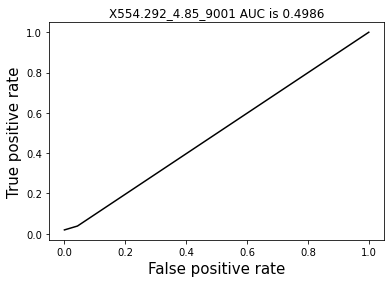

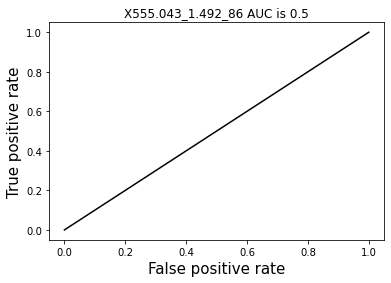

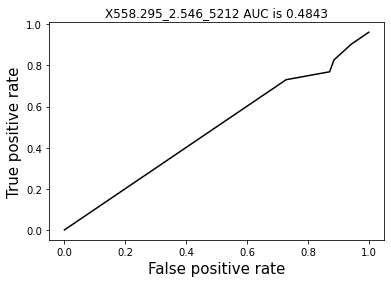

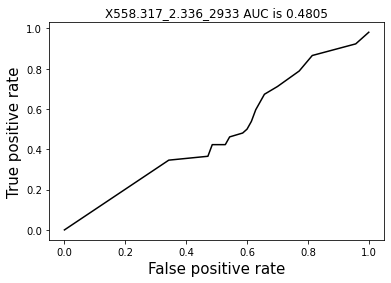

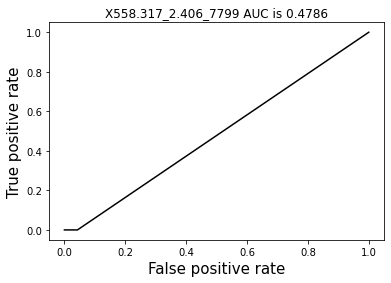

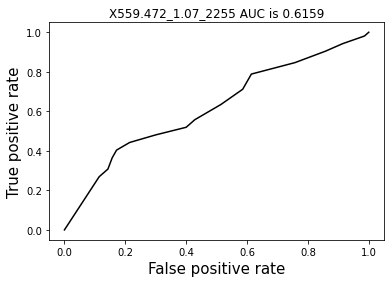

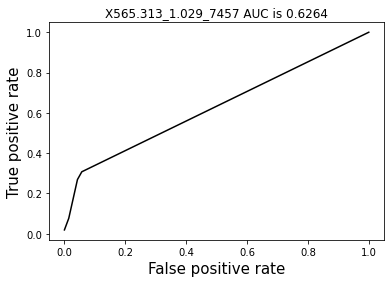

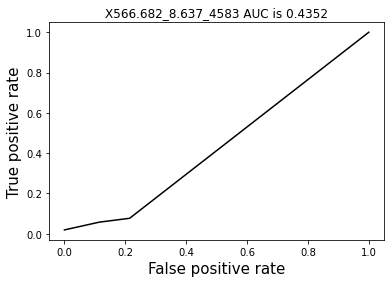

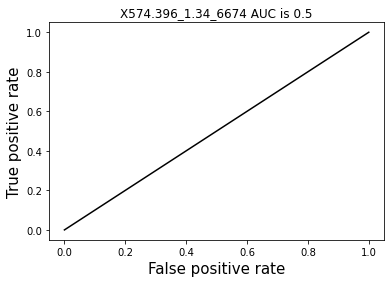

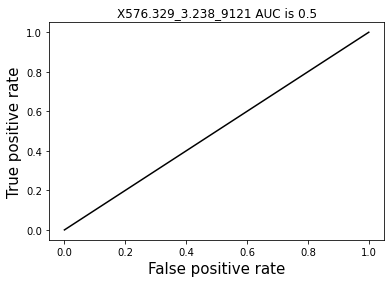

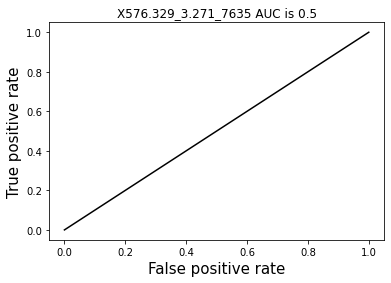

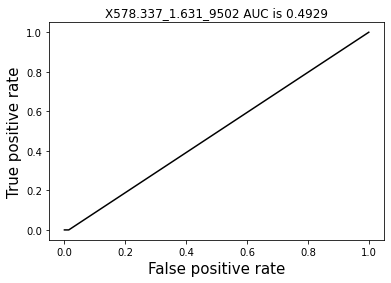

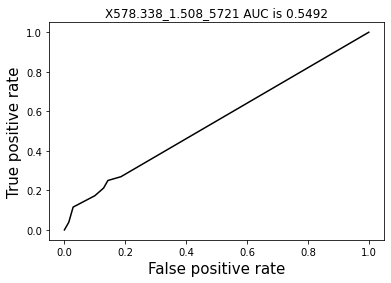

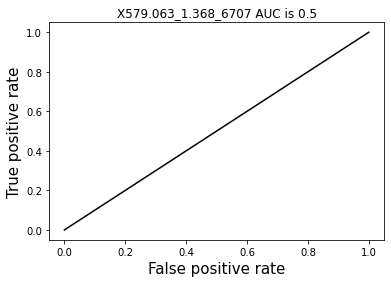

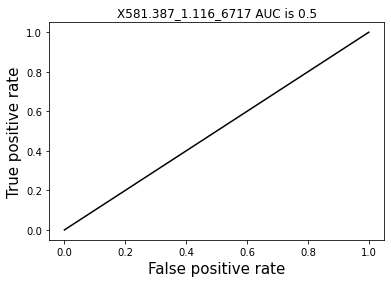

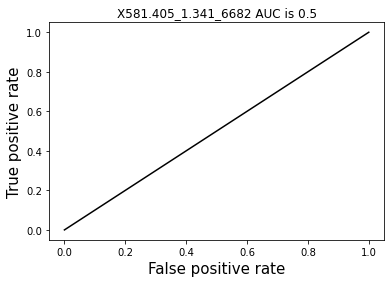

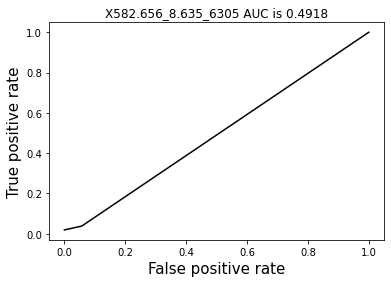

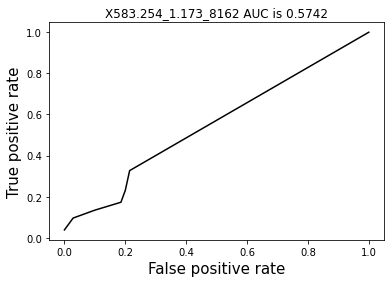

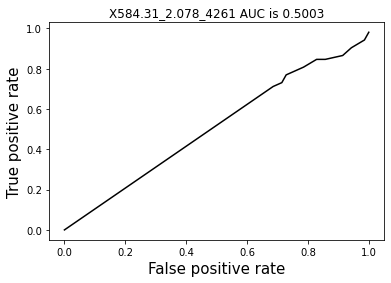

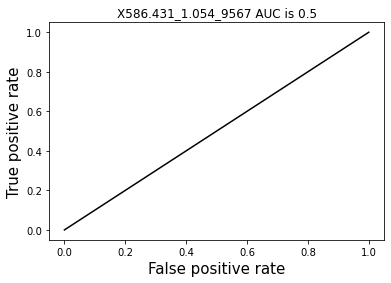

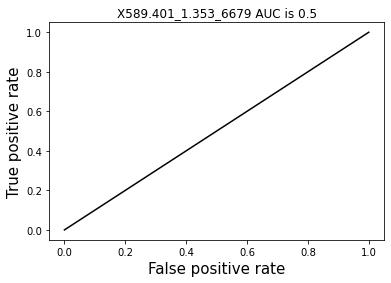

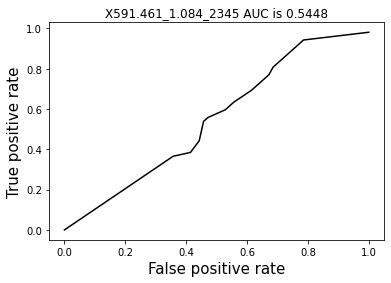

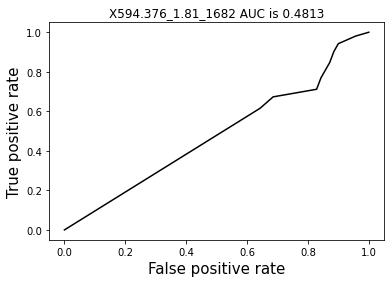

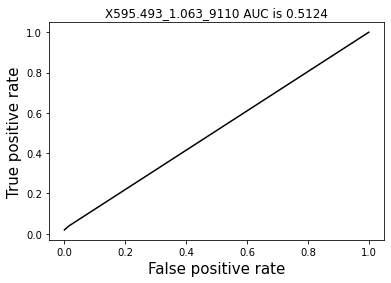

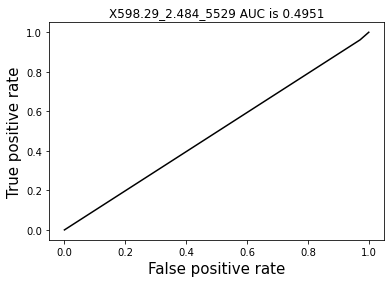

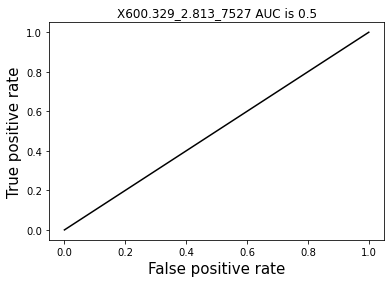

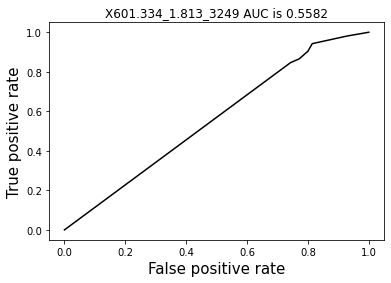

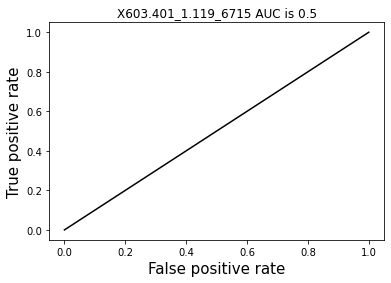

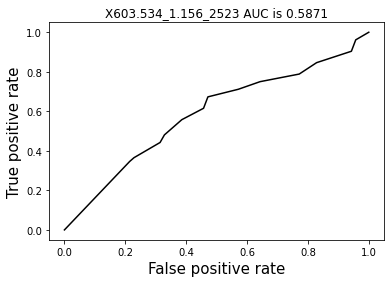

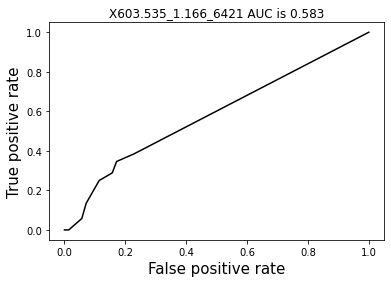

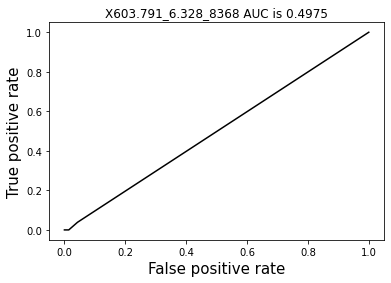

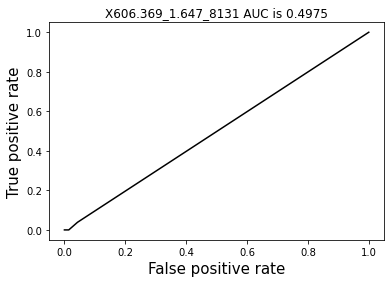

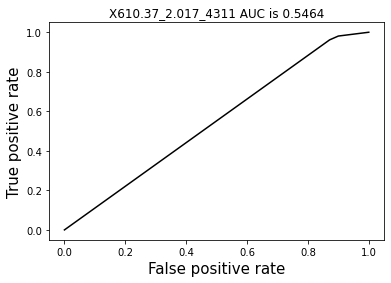

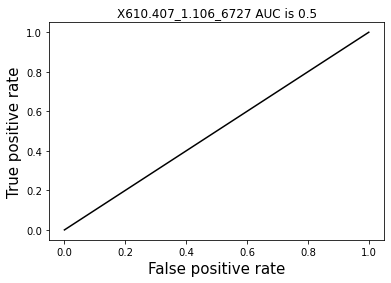

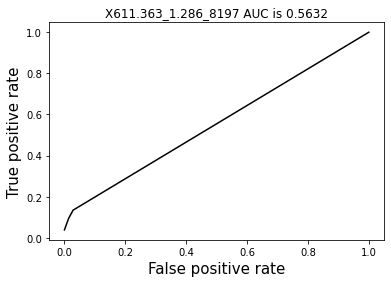

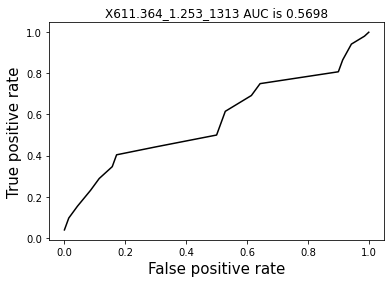

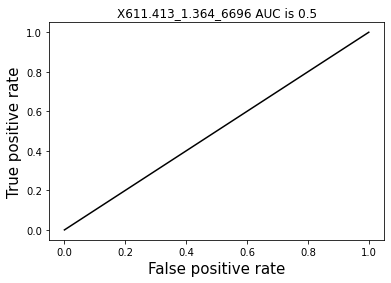

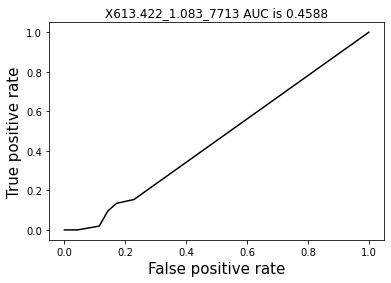

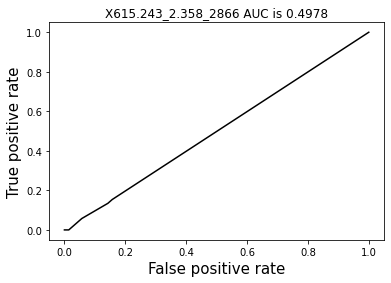

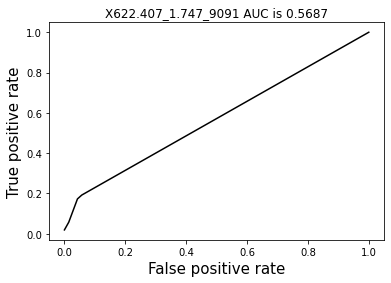

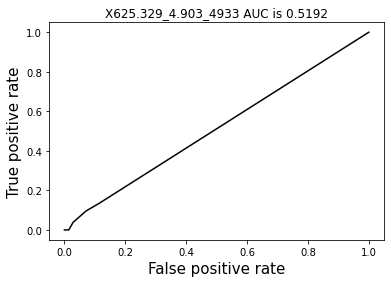

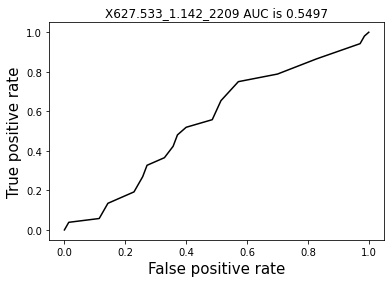

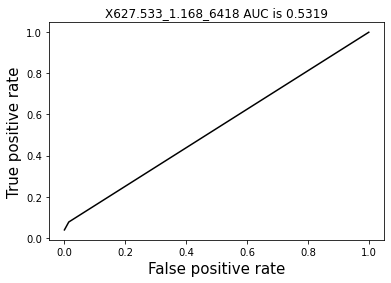

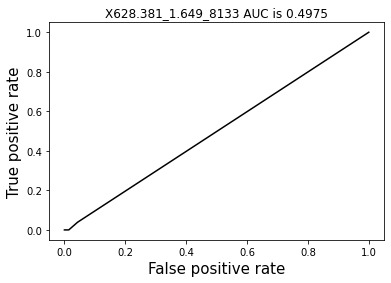

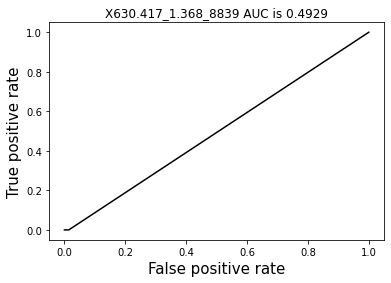

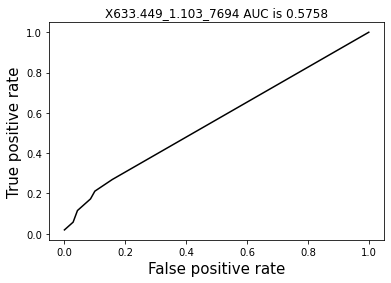

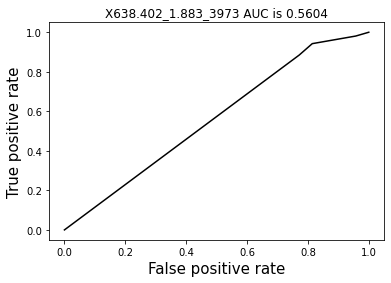

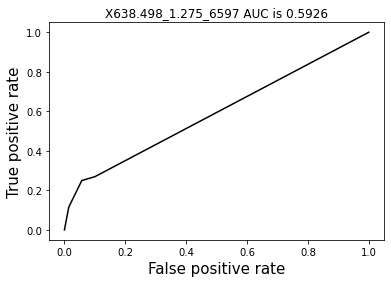

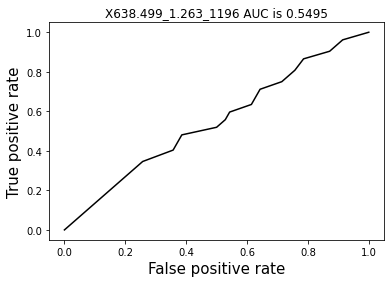

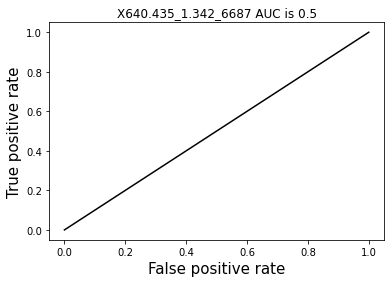

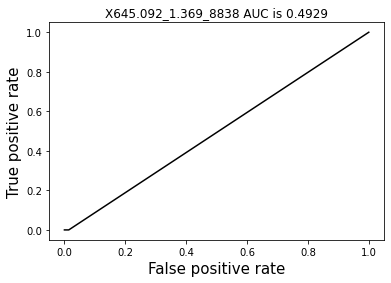

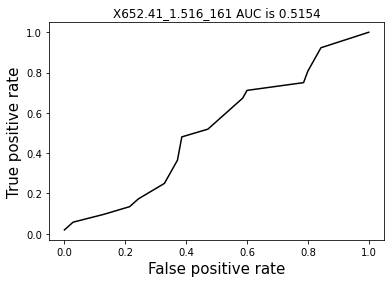

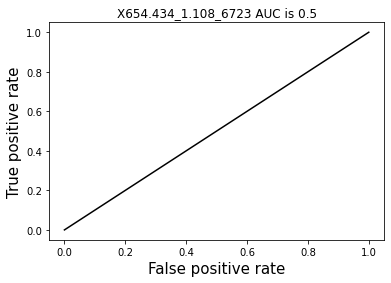

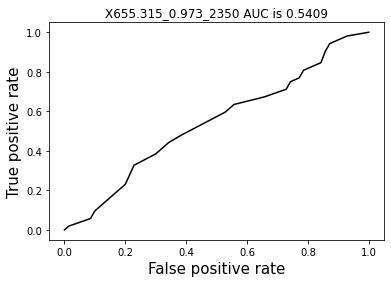

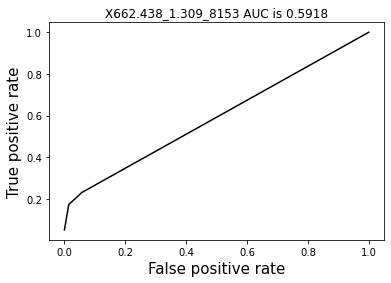

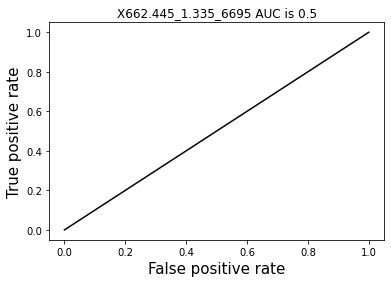

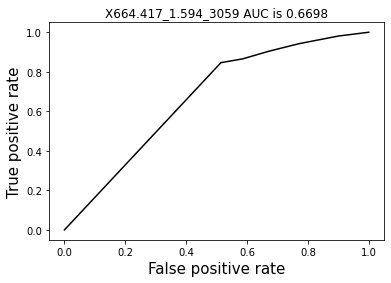

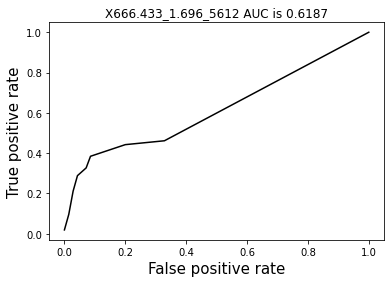

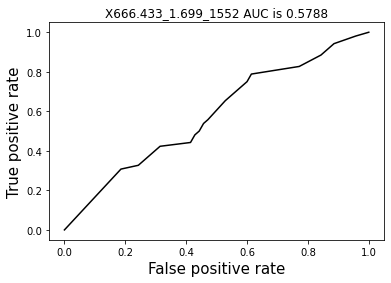

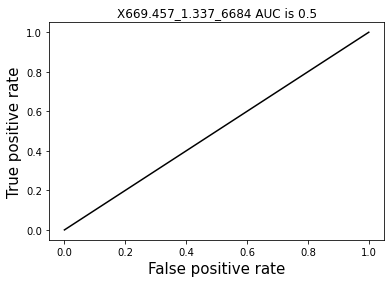

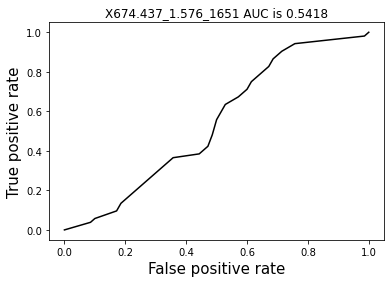

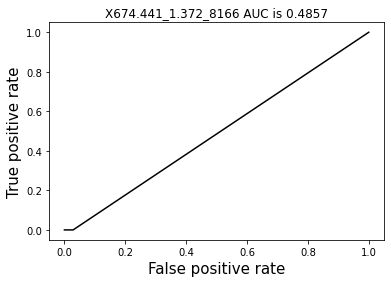

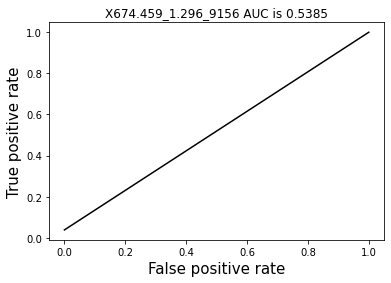

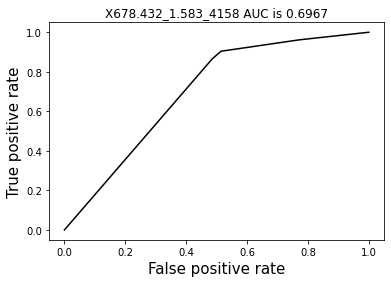

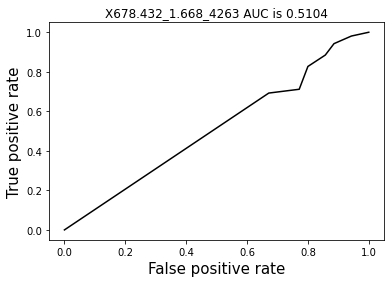

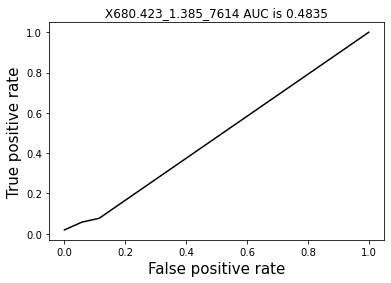

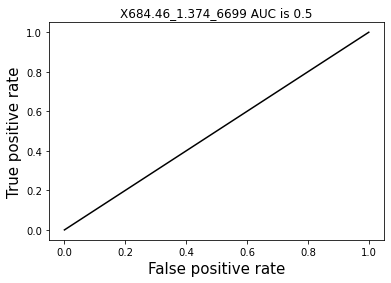

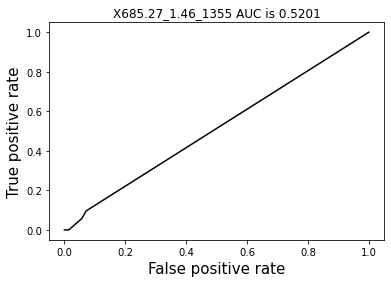

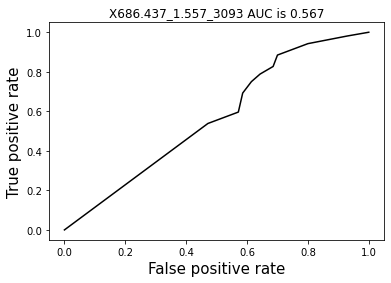

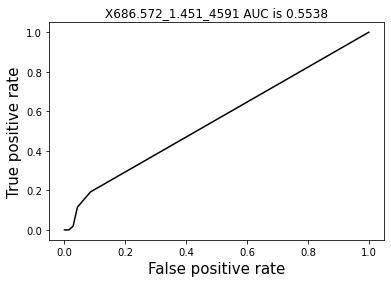

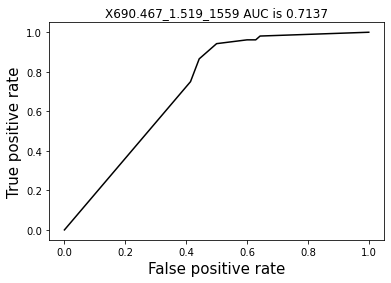

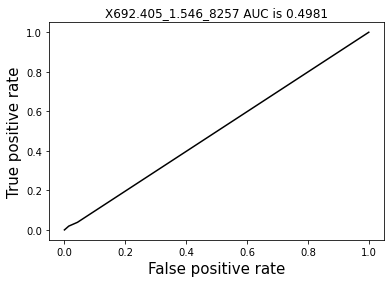

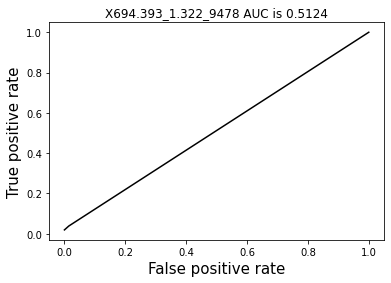

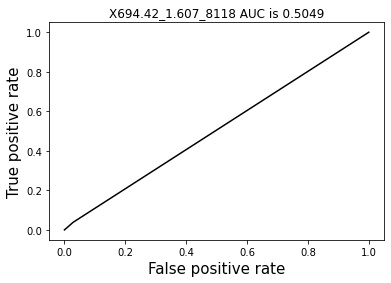

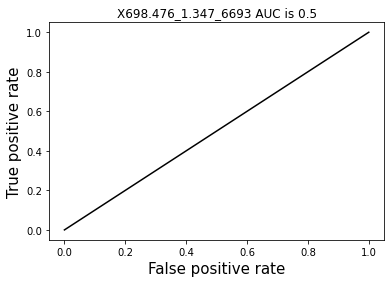

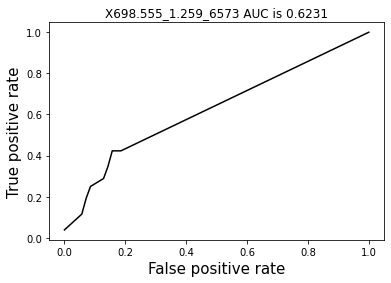

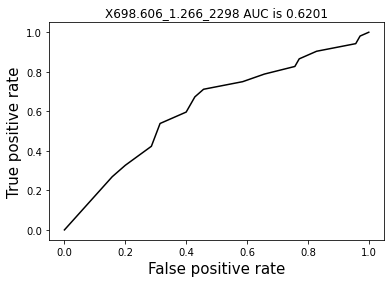

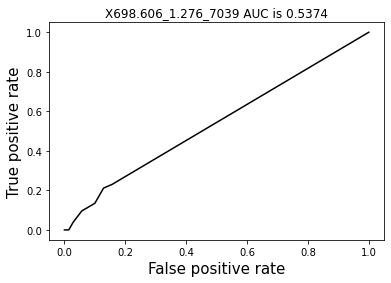

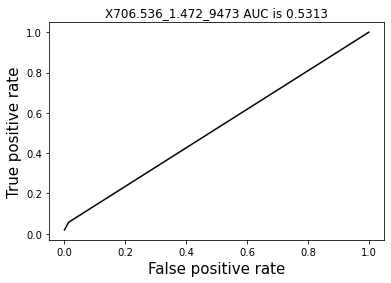

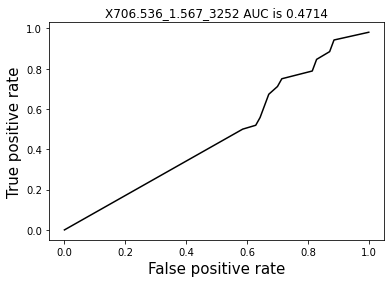

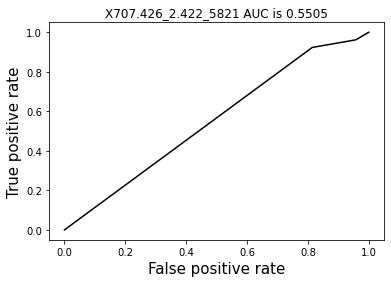

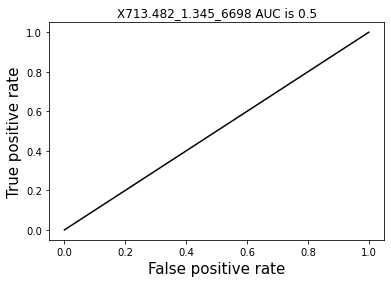

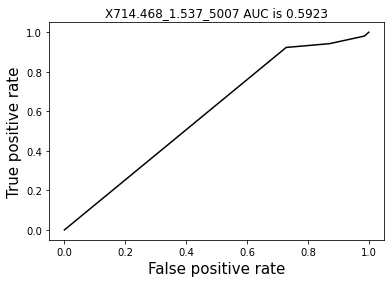

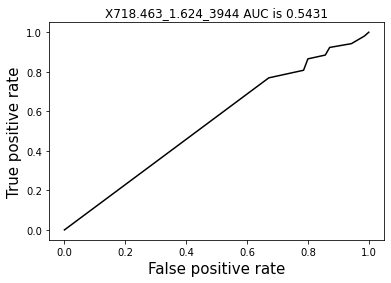

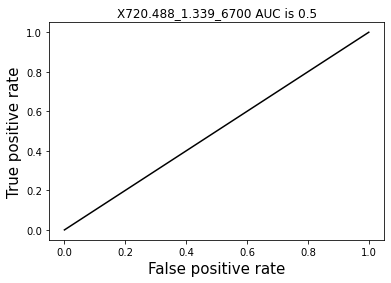

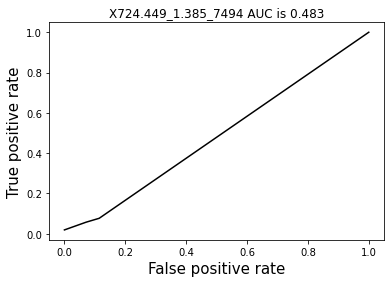

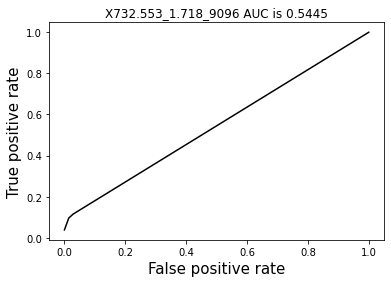

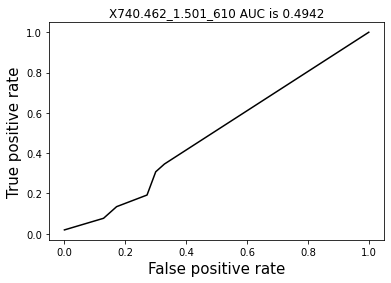

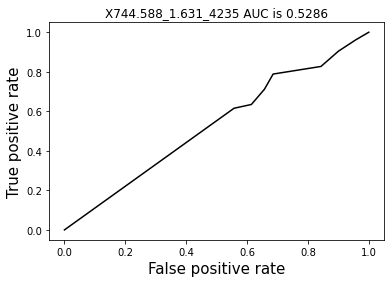

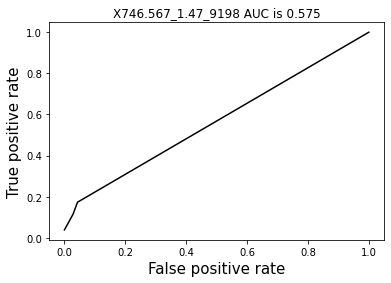

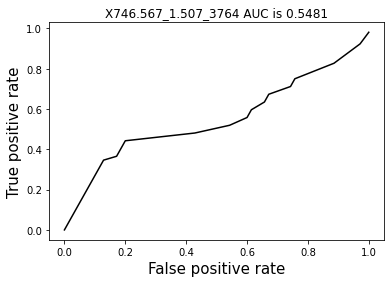

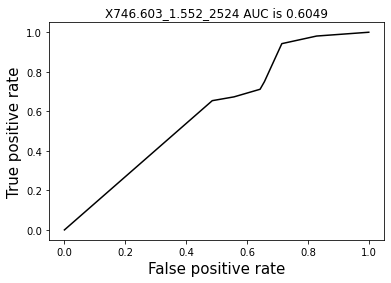

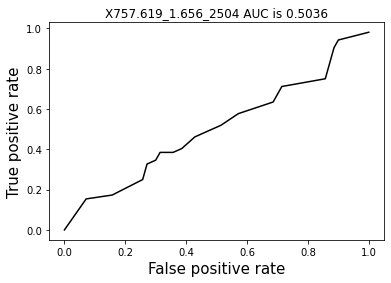

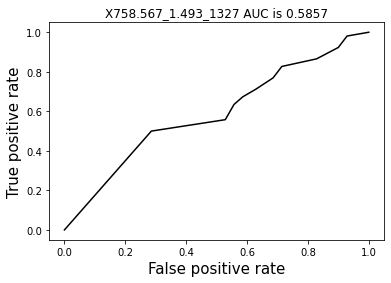

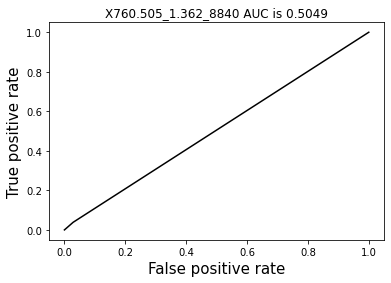

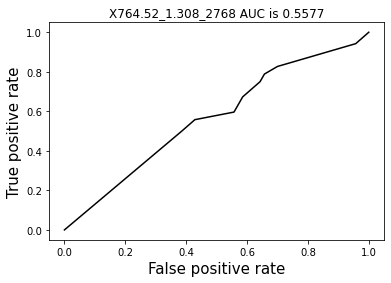

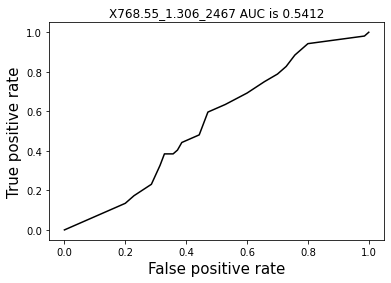

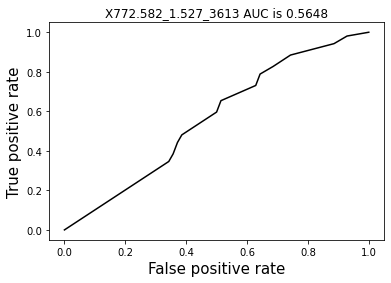

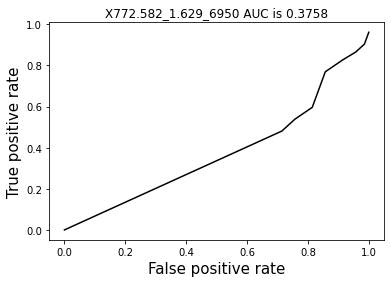

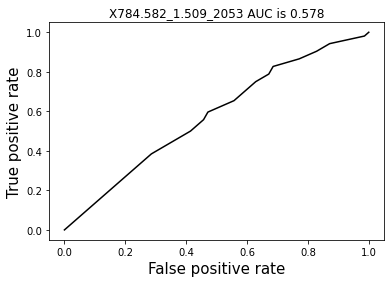

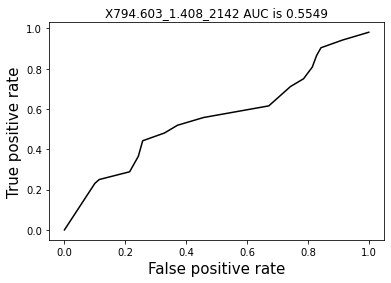

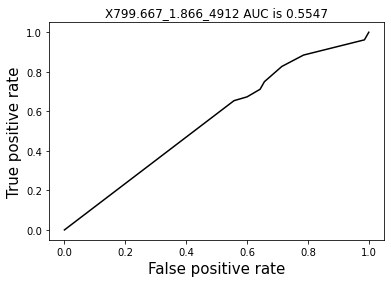

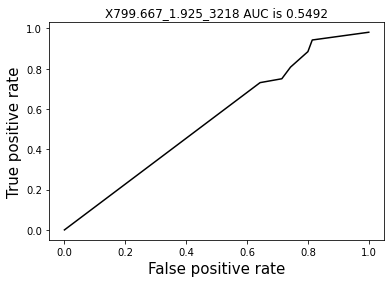

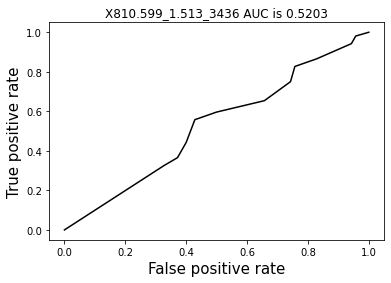

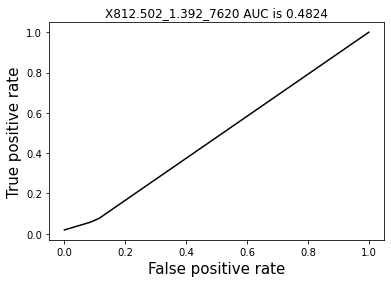

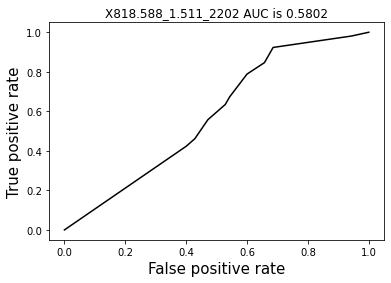

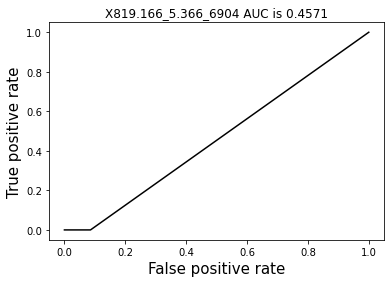

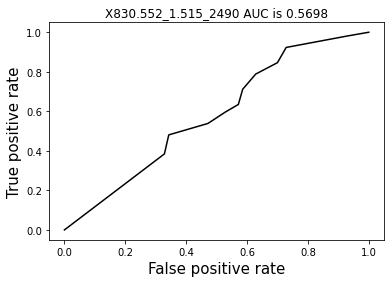

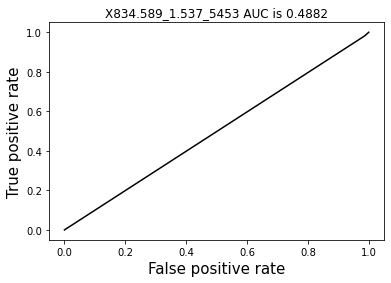

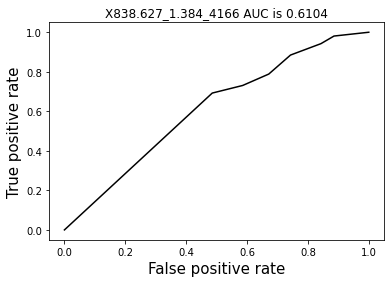

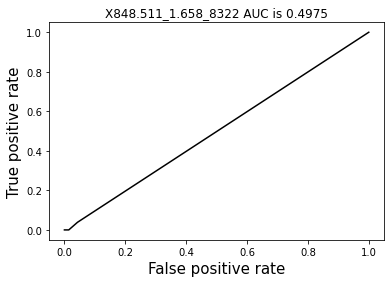

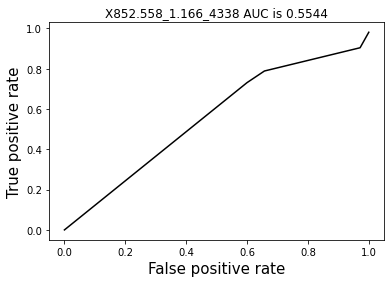

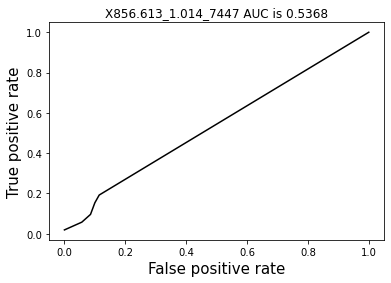

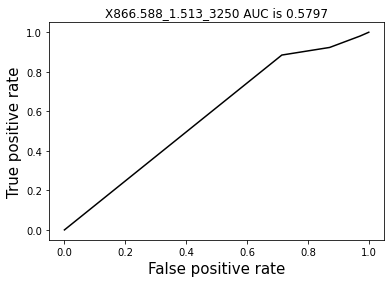

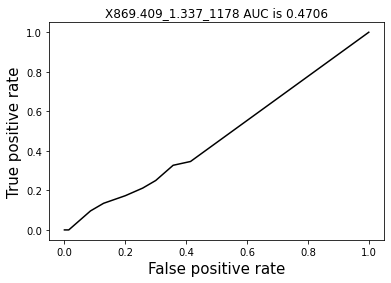

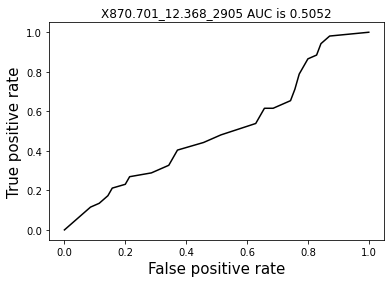

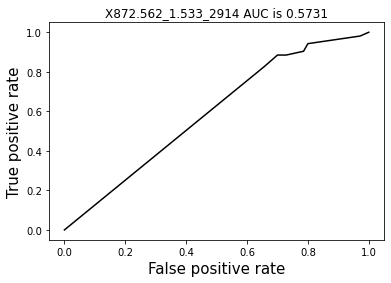

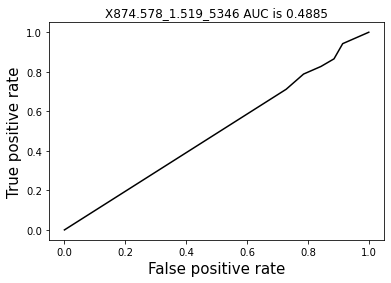

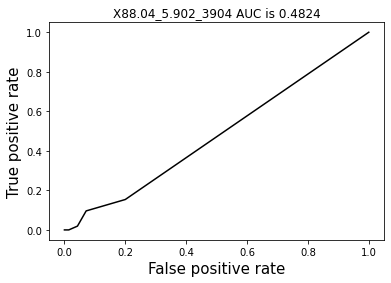

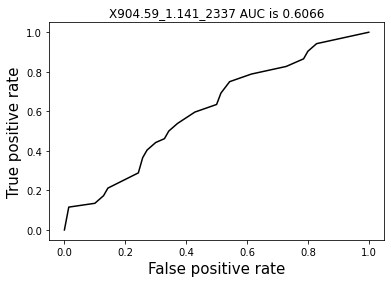

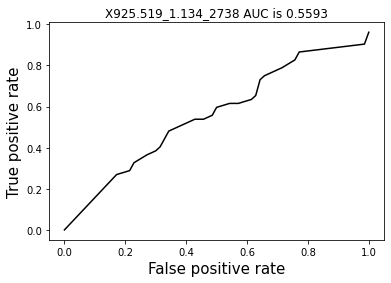

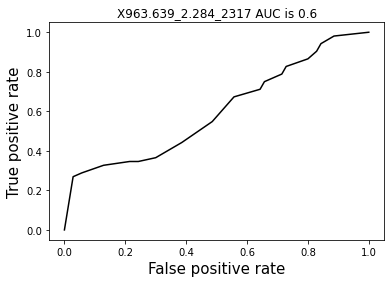

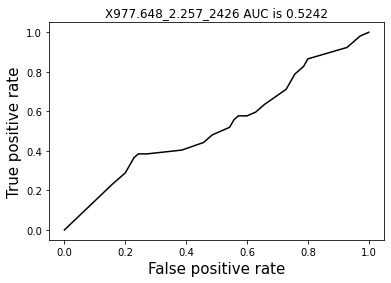

In [2]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_train_df = pd.read_csv("05092023-pos-philic-M-F-test.csv")
data_test_df = pd.read_csv("05092023-pos-philic-M-F-train.csv")
mass_list_df = pd.read_csv("pos-philic-ship2-in-ship1.csv")
mass_list = mass_list_df.filename.to_list()
print(mass_list)

binary_label = {'inf_prog':1, 'inf_non':0}
y_train = data_train_df['status'].map(binary_label)
y_test = data_test_df['status'].map(binary_label)

auc_list = []

for mass in mass_list:
    fig1, ax1 = plt.subplots()
    X_train = data_train_df[[str(mass)]]
    X_test = data_test_df[[str(mass)]]
    #plt.figure(0).clf()
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    auc_list.append(auc)
    sns.lineplot(x=fpr,y=tpr, ci=None, color="black")
    ax1.set_xlabel('False positive rate', fontsize=15)
    ax1.set_ylabel('True positive rate', fontsize=15)
    ax1.set_title(mass + ' AUC is ' + str(auc))
    plt.savefig("pos_philic_AUC_ship2_in_ship1_" + str(mass) + ".png", dpi=300, bbox_inches='tight')

auc_df = pd.DataFrame(list(zip(mass_list, auc_list)), columns=['filename', 'AUC'])
final_df = mass_list_df.merge(auc_df, how='outer', on=['filename'])
final_df.to_csv('pos-philic-ship2-in-ship1-AUC.csv', index=False)